### Linear Algebra, Calculus, and Gradient Descent

#### Objectives
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">

It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Recommendation engines are able to make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "./resources/netflix.png">

### Group 1: using code to explain vectors and scalars

In [1]:
import numpy as np

## Vectors

An array with magnitude and direction. The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin.


Operations with vectores
Assume

$ \vec{v} = \begin{bmatrix}v_{1} \\v_{2}\end{bmatrix} $


$ \vec{w} = \begin{bmatrix}w_{1} \\w_{2}\end{bmatrix} $

$ \vec{v} + \vec{w} = \begin{bmatrix}v_{1} + w_{1} \\v_{2} + w_{2}\end{bmatrix} $

What is happening graphically? Let's look at an example:


In [2]:

import numpy as np
v = np.array([2, 4])
w = np.array([3, 2])
v + w

array([5, 6])

#### Scalars

Have magnitude only. Can be multiplied by a vector or matrix to create a change in **scale** and/or direction.

What scalars would you need to change the direction of a vector?

In [3]:
v * 4

array([ 8, 16])

### Group 2: Desmos to explore vectors and scalars

[link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)

To capture the relationship between (*a, b*), to capture the _direction_ rather than the length, what mathematical concept would you use?

### Group 3: Youtube vid

[Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Linear Combination
If $v_{1},...,v_{n}$ are vectors and $a_{1},...,a_{n}$ are scalars, then the linear combination of those vectors with those scalars as coefficients is

<img src = "./resources/linear_combinations.svg"> 

### Dot Product

Can be thought of as one vector projected onto another

The dot product of v and w is $v \cdot w = (v_{1})(w_{2}) + (v_{1})(v_{2}) $

### _**Details of dot product for those who are interested**_

If v and w are perpendicular ($90^\circ$), their dot product will be 0.

If the angle between v and w is < $90^\circ$, the dot product will be positive.

If the angle between v and w is between $90^\circ$ and $180^\circ$, the dot product will be negative.





“The scalar projection of A onto B multiplied by the magnitude of B”

“The scalar projection of B onto A multiplied by the magnitude of A”

<img src = "./resources/dot_product.png">

<img src = "./resources/dot_product_components.png">

We are essentially, rotating vectors to the point of 
a · b = |a| × |b| × cos(θ)

Analogy from https://www.youtube.com/watch?v=FrDAU2N0FEg

In [4]:
v.dot(w)

14

## Application of dot product:

Imagine you are an e-commerce company. You have vectors to represent the transactions made with one of your items. Q is the quantity and represent the amount of cash either bought or sold.

$ Income = (q_{1},q_{2},q_{3})\cdot (p_{1},p_{2},p_{3}) $

What story is this telling?

In [5]:
q = np.array([4,6,10])
p = np.array([50,-30,45])

q.dot(p)

470

Wait, does that look familiar somehow?

## Slide break!

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

**Good video on details of gradient decent**

https://www.youtube.com/watch?v=sDv4f4s2SB8

### Gradient Descent


[slide deck!](https://docs.google.com/presentation/d/15sZl0yjwrjXkOSftImmAlEOgJxB7Qc8e2vocvMUkRWI/edit?usp=sharing)

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [7]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [10]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

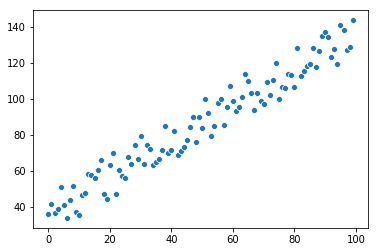

In [11]:
sns.scatterplot(x=x[:,1], y=y)

In [16]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

Iteration 0 | Cost: 183.012674
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 182.775756
[1.90676908 1.52901856]
Iteration 2 | Cost: 182.664494
[1.90761219 1.52549101]
Iteration 3 | Cost: 182.609905
[1.90847269 1.52311756]
Iteration 4 | Cost: 182.580876
[1.90934484 1.52151917]
Iteration 5 | Cost: 182.563375
[1.91022482 1.5204413 ]
Iteration 6 | Cost: 182.551073
[1.91111005 1.51971299]
Iteration 7 | Cost: 182.541117
[1.91199879 1.51921944]
Iteration 8 | Cost: 182.532219
[1.91288989 1.51888354]
Iteration 9 | Cost: 182.523799
[1.91378256 1.51865353]
Iteration 10 | Cost: 182.515594
[1.91467629 1.51849462]
Iteration 11 | Cost: 182.507486
[1.9155707  1.51838347]
Iteration 12 | Cost: 182.499423
[1.91646558 1.51830438]
Iteration 13 | Cost: 182.491379
[1.91736076 1.51824684]
Iteration 14 | Cost: 182.483345
[1.91825614 1.51820375]
Iteration 15 | Cost: 182.475316
[1.91915164 1.51817039]
Iteration 16 | Cost: 182.467288
[1.92004722 1.51814354]
Iteration 17 | Cost: 182.459262
[1.92094284 1.51812108]
It

Iteration 856 | Cost: 175.867372
[2.66452845 1.50689206]
Iteration 857 | Cost: 175.859681
[2.66540532 1.50687884]
Iteration 858 | Cost: 175.851991
[2.66628216 1.50686562]
Iteration 859 | Cost: 175.844301
[2.66715898 1.5068524 ]
Iteration 860 | Cost: 175.836612
[2.66803578 1.50683918]
Iteration 861 | Cost: 175.828923
[2.66891256 1.50682596]
Iteration 862 | Cost: 175.821234
[2.66978931 1.50681274]
Iteration 863 | Cost: 175.813546
[2.67066605 1.50679952]
Iteration 864 | Cost: 175.805858
[2.67154276 1.50678631]
Iteration 865 | Cost: 175.798171
[2.67241944 1.50677309]
Iteration 866 | Cost: 175.790484
[2.67329611 1.50675987]
Iteration 867 | Cost: 175.782797
[2.67417275 1.50674665]
Iteration 868 | Cost: 175.775111
[2.67504937 1.50673344]
Iteration 869 | Cost: 175.767425
[2.67592597 1.50672022]
Iteration 870 | Cost: 175.759739
[2.67680255 1.50670701]
Iteration 871 | Cost: 175.752054
[2.6776791  1.50669379]
Iteration 872 | Cost: 175.744369
[2.67855564 1.50668058]
Iteration 873 | Cost: 175.73668

Iteration 1623 | Cost: 170.081858
[3.33059129 1.49685013]
Iteration 1624 | Cost: 170.074461
[3.33145125 1.49683717]
Iteration 1625 | Cost: 170.067065
[3.3323112 1.4968242]
Iteration 1626 | Cost: 170.059668
[3.33317112 1.49681124]
Iteration 1627 | Cost: 170.052272
[3.33403102 1.49679827]
Iteration 1628 | Cost: 170.044877
[3.3348909  1.49678531]
Iteration 1629 | Cost: 170.037482
[3.33575076 1.49677235]
Iteration 1630 | Cost: 170.030087
[3.3366106  1.49675938]
Iteration 1631 | Cost: 170.022693
[3.33747041 1.49674642]
Iteration 1632 | Cost: 170.015299
[3.3383302  1.49673346]
Iteration 1633 | Cost: 170.007905
[3.33918998 1.49672049]
Iteration 1634 | Cost: 170.000512
[3.34004972 1.49670753]
Iteration 1635 | Cost: 169.993119
[3.34090945 1.49669457]
Iteration 1636 | Cost: 169.985726
[3.34176916 1.49668161]
Iteration 1637 | Cost: 169.978334
[3.34262884 1.49666865]
Iteration 1638 | Cost: 169.970942
[3.3434885  1.49665569]
Iteration 1639 | Cost: 169.963551
[3.34434814 1.49664273]
Iteration 1640 |

Iteration 2375 | Cost: 164.623953
[3.97116443 1.4871925 ]
Iteration 2376 | Cost: 164.616833
[3.97200815 1.48717978]
Iteration 2377 | Cost: 164.609713
[3.97285184 1.48716706]
Iteration 2378 | Cost: 164.602594
[3.97369551 1.48715434]
Iteration 2379 | Cost: 164.595475
[3.97453916 1.48714163]
Iteration 2380 | Cost: 164.588356
[3.97538279 1.48712891]
Iteration 2381 | Cost: 164.581238
[3.9762264  1.48711619]
Iteration 2382 | Cost: 164.574120
[3.97706999 1.48710347]
Iteration 2383 | Cost: 164.567003
[3.97791355 1.48709075]
Iteration 2384 | Cost: 164.559885
[3.9787571  1.48707803]
Iteration 2385 | Cost: 164.552769
[3.97960062 1.48706532]
Iteration 2386 | Cost: 164.545652
[3.98044412 1.4870526 ]
Iteration 2387 | Cost: 164.538536
[3.9812876  1.48703988]
Iteration 2388 | Cost: 164.531420
[3.98213106 1.48702717]
Iteration 2389 | Cost: 164.524305
[3.98297449 1.48701445]
Iteration 2390 | Cost: 164.517190
[3.98381791 1.48700173]
Iteration 2391 | Cost: 164.510075
[3.9846613  1.48698902]
Iteration 2392

Iteration 3182 | Cost: 158.993964
[4.64512791 1.47703147]
Iteration 3183 | Cost: 158.987129
[4.64595452 1.477019  ]
Iteration 3184 | Cost: 158.980295
[4.64678112 1.47700654]
Iteration 3185 | Cost: 158.973462
[4.64760769 1.47699408]
Iteration 3186 | Cost: 158.966628
[4.64843425 1.47698162]
Iteration 3187 | Cost: 158.959795
[4.64926078 1.47696916]
Iteration 3188 | Cost: 158.952963
[4.65008729 1.4769567 ]
Iteration 3189 | Cost: 158.946130
[4.65091378 1.47694424]
Iteration 3190 | Cost: 158.939298
[4.65174025 1.47693177]
Iteration 3191 | Cost: 158.932467
[4.6525667  1.47691931]
Iteration 3192 | Cost: 158.925635
[4.65339312 1.47690686]
Iteration 3193 | Cost: 158.918805
[4.65421953 1.4768944 ]
Iteration 3194 | Cost: 158.911974
[4.65504591 1.47688194]
Iteration 3195 | Cost: 158.905144
[4.65587228 1.47686948]
Iteration 3196 | Cost: 158.898314
[4.65669862 1.47685702]
Iteration 3197 | Cost: 158.891484
[4.65752494 1.47684456]
Iteration 3198 | Cost: 158.884655
[4.65835125 1.4768321 ]
Iteration 3199

Iteration 3997 | Cost: 153.537391
[5.31191079 1.46697869]
Iteration 3998 | Cost: 153.530834
[5.31272049 1.46696648]
Iteration 3999 | Cost: 153.524277
[5.31353017 1.46695427]
Iteration 4000 | Cost: 153.517720
[5.31433982 1.46694206]
Iteration 4001 | Cost: 153.511163
[5.31514946 1.46692986]
Iteration 4002 | Cost: 153.504607
[5.31595908 1.46691765]
Iteration 4003 | Cost: 153.498051
[5.31676867 1.46690545]
Iteration 4004 | Cost: 153.491496
[5.31757825 1.46689324]
Iteration 4005 | Cost: 153.484940
[5.3183878  1.46688104]
Iteration 4006 | Cost: 153.478385
[5.31919734 1.46686883]
Iteration 4007 | Cost: 153.471831
[5.32000685 1.46685663]
Iteration 4008 | Cost: 153.465277
[5.32081635 1.46684442]
Iteration 4009 | Cost: 153.458723
[5.32162582 1.46683222]
Iteration 4010 | Cost: 153.452169
[5.32243527 1.46682001]
Iteration 4011 | Cost: 153.445616
[5.3232447  1.46680781]
Iteration 4012 | Cost: 153.439063
[5.32405411 1.46679561]
Iteration 4013 | Cost: 153.432511
[5.32486351 1.4667834 ]
Iteration 4014

Iteration 4860 | Cost: 148.000225
[6.00309514 1.45655802]
Iteration 4861 | Cost: 147.993949
[6.0038873  1.45654607]
Iteration 4862 | Cost: 147.987672
[6.00467945 1.45653413]
Iteration 4863 | Cost: 147.981396
[6.00547157 1.45652219]
Iteration 4864 | Cost: 147.975121
[6.00626367 1.45651025]
Iteration 4865 | Cost: 147.968846
[6.00705575 1.4564983 ]
Iteration 4866 | Cost: 147.962571
[6.00784782 1.45648636]
Iteration 4867 | Cost: 147.956296
[6.00863986 1.45647442]
Iteration 4868 | Cost: 147.950022
[6.00943188 1.45646248]
Iteration 4869 | Cost: 147.943748
[6.01022388 1.45645054]
Iteration 4870 | Cost: 147.937474
[6.01101586 1.4564386 ]
Iteration 4871 | Cost: 147.931201
[6.01180782 1.45642666]
Iteration 4872 | Cost: 147.924927
[6.01259977 1.45641472]
Iteration 4873 | Cost: 147.918655
[6.01339169 1.45640278]
Iteration 4874 | Cost: 147.912382
[6.01418359 1.45639084]
Iteration 4875 | Cost: 147.906110
[6.01497547 1.4563789 ]
Iteration 4876 | Cost: 147.899838
[6.01576733 1.45636696]
Iteration 4877

[6.60870216 1.44742756]
Iteration 5633 | Cost: 143.242243
[6.60947896 1.44741585]
Iteration 5634 | Cost: 143.236208
[6.61025574 1.44740413]
Iteration 5635 | Cost: 143.230173
[6.61103249 1.44739242]
Iteration 5636 | Cost: 143.224138
[6.61180923 1.44738071]
Iteration 5637 | Cost: 143.218104
[6.61258595 1.447369  ]
Iteration 5638 | Cost: 143.212070
[6.61336265 1.44735729]
Iteration 5639 | Cost: 143.206037
[6.61413933 1.44734558]
Iteration 5640 | Cost: 143.200003
[6.61491599 1.44733387]
Iteration 5641 | Cost: 143.193970
[6.61569263 1.44732216]
Iteration 5642 | Cost: 143.187938
[6.61646925 1.44731046]
Iteration 5643 | Cost: 143.181905
[6.61724585 1.44729875]
Iteration 5644 | Cost: 143.175873
[6.61802243 1.44728704]
Iteration 5645 | Cost: 143.169841
[6.61879899 1.44727533]
Iteration 5646 | Cost: 143.163810
[6.61957554 1.44726362]
Iteration 5647 | Cost: 143.157779
[6.62035206 1.44725192]
Iteration 5648 | Cost: 143.151748
[6.62112856 1.44724021]
Iteration 5649 | Cost: 143.145717
[6.62190504 1.

Iteration 6494 | Cost: 138.157738
[7.27104115 1.43744178]
Iteration 6495 | Cost: 138.151961
[7.27180114 1.43743032]
Iteration 6496 | Cost: 138.146184
[7.27256112 1.43741886]
Iteration 6497 | Cost: 138.140407
[7.27332107 1.4374074 ]
Iteration 6498 | Cost: 138.134631
[7.27408101 1.43739594]
Iteration 6499 | Cost: 138.128855
[7.27484092 1.43738449]
Iteration 6500 | Cost: 138.123080
[7.27560082 1.43737303]
Iteration 6501 | Cost: 138.117304
[7.2763607  1.43736157]
Iteration 6502 | Cost: 138.111529
[7.27712056 1.43735012]
Iteration 6503 | Cost: 138.105754
[7.2778804  1.43733866]
Iteration 6504 | Cost: 138.099980
[7.27864022 1.43732721]
Iteration 6505 | Cost: 138.094206
[7.27940002 1.43731575]
Iteration 6506 | Cost: 138.088432
[7.2801598 1.4373043]
Iteration 6507 | Cost: 138.082658
[7.28091956 1.43729284]
Iteration 6508 | Cost: 138.076885
[7.2816793  1.43728139]
Iteration 6509 | Cost: 138.071112
[7.28243903 1.43726993]
Iteration 6510 | Cost: 138.065339
[7.28319873 1.43725848]
Iteration 6511 |

Iteration 7356 | Cost: 133.285060
[7.91905192 1.42767201]
Iteration 7357 | Cost: 133.279530
[7.91979547 1.4276608 ]
Iteration 7358 | Cost: 133.274001
[7.920539   1.42764959]
Iteration 7359 | Cost: 133.268472
[7.92128252 1.42763838]
Iteration 7360 | Cost: 133.262942
[7.92202601 1.42762717]
Iteration 7361 | Cost: 133.257414
[7.92276949 1.42761597]
Iteration 7362 | Cost: 133.251885
[7.92351295 1.42760476]
Iteration 7363 | Cost: 133.246357
[7.92425639 1.42759355]
Iteration 7364 | Cost: 133.240829
[7.92499981 1.42758234]
Iteration 7365 | Cost: 133.235301
[7.92574321 1.42757113]
Iteration 7366 | Cost: 133.229774
[7.92648659 1.42755992]
Iteration 7367 | Cost: 133.224247
[7.92722996 1.42754872]
Iteration 7368 | Cost: 133.218720
[7.9279733  1.42753751]
Iteration 7369 | Cost: 133.213194
[7.92871663 1.4275263 ]
Iteration 7370 | Cost: 133.207667
[7.92945994 1.4275151 ]
Iteration 7371 | Cost: 133.202141
[7.93020322 1.42750389]
Iteration 7372 | Cost: 133.196616
[7.93094649 1.42749268]
Iteration 7373

Iteration 8127 | Cost: 129.103731
[8.48676755 1.41911283]
Iteration 8128 | Cost: 129.098413
[8.4874967  1.41910183]
Iteration 8129 | Cost: 129.093096
[8.48822583 1.41909084]
Iteration 8130 | Cost: 129.087779
[8.48895494 1.41907985]
Iteration 8131 | Cost: 129.082462
[8.48968403 1.41906885]
Iteration 8132 | Cost: 129.077145
[8.49041311 1.41905786]
Iteration 8133 | Cost: 129.071829
[8.49114217 1.41904687]
Iteration 8134 | Cost: 129.066513
[8.4918712  1.41903588]
Iteration 8135 | Cost: 129.061197
[8.49260022 1.41902489]
Iteration 8136 | Cost: 129.055881
[8.49332922 1.4190139 ]
Iteration 8137 | Cost: 129.050566
[8.49405821 1.41900291]
Iteration 8138 | Cost: 129.045251
[8.49478717 1.41899192]
Iteration 8139 | Cost: 129.039936
[8.49551612 1.41898093]
Iteration 8140 | Cost: 129.034622
[8.49624504 1.41896994]
Iteration 8141 | Cost: 129.029307
[8.49697395 1.41895895]
Iteration 8142 | Cost: 129.023993
[8.49770284 1.41894796]
Iteration 8143 | Cost: 129.018680
[8.49843171 1.41893697]
Iteration 8144

Iteration 8985 | Cost: 124.638906
[9.10562511 1.40978259]
Iteration 8986 | Cost: 124.633815
[9.10633856 1.40977184]
Iteration 8987 | Cost: 124.628724
[9.10705199 1.40976108]
Iteration 8988 | Cost: 124.623633
[9.1077654  1.40975033]
Iteration 8989 | Cost: 124.618543
[9.10847879 1.40973957]
Iteration 8990 | Cost: 124.613453
[9.10919217 1.40972881]
Iteration 8991 | Cost: 124.608363
[9.10990553 1.40971806]
Iteration 8992 | Cost: 124.603273
[9.11061887 1.4097073 ]
Iteration 8993 | Cost: 124.598184
[9.11133219 1.40969655]
Iteration 8994 | Cost: 124.593095
[9.11204549 1.4096858 ]
Iteration 8995 | Cost: 124.588006
[9.11275878 1.40967504]
Iteration 8996 | Cost: 124.582917
[9.11347204 1.40966429]
Iteration 8997 | Cost: 124.577829
[9.11418529 1.40965354]
Iteration 8998 | Cost: 124.572741
[9.11489852 1.40964278]
Iteration 8999 | Cost: 124.567653
[9.11561174 1.40963203]
Iteration 9000 | Cost: 124.562565
[9.11632493 1.40962128]
Iteration 9001 | Cost: 124.557478
[9.11703811 1.40961052]
Iteration 9002

Iteration 9818 | Cost: 120.486234
[9.69369864 1.40091648]
Iteration 9819 | Cost: 120.481353
[9.69439717 1.40090595]
Iteration 9820 | Cost: 120.476473
[9.69509568 1.40089542]
Iteration 9821 | Cost: 120.471593
[9.69579417 1.40088488]
Iteration 9822 | Cost: 120.466714
[9.69649265 1.40087435]
Iteration 9823 | Cost: 120.461834
[9.6971911  1.40086382]
Iteration 9824 | Cost: 120.456955
[9.69788954 1.40085329]
Iteration 9825 | Cost: 120.452076
[9.69858797 1.40084276]
Iteration 9826 | Cost: 120.447197
[9.69928637 1.40083223]
Iteration 9827 | Cost: 120.442319
[9.69998476 1.40082171]
Iteration 9828 | Cost: 120.437440
[9.70068312 1.40081118]
Iteration 9829 | Cost: 120.432562
[9.70138147 1.40080065]
Iteration 9830 | Cost: 120.427685
[9.70207981 1.40079012]
Iteration 9831 | Cost: 120.422807
[9.70277812 1.40077959]
Iteration 9832 | Cost: 120.417930
[9.70347642 1.40076906]
Iteration 9833 | Cost: 120.413053
[9.7041747  1.40075854]
Iteration 9834 | Cost: 120.408176
[9.70487296 1.40074801]
Iteration 9835

[10.24963278  1.39253491]
Iteration 10623 | Cost: 116.636526
[10.2503172  1.3925246]
Iteration 10624 | Cost: 116.631841
[10.25100161  1.39251428]
Iteration 10625 | Cost: 116.627156
[10.25168599  1.39250396]
Iteration 10626 | Cost: 116.622471
[10.25237036  1.39249364]
Iteration 10627 | Cost: 116.617787
[10.25305472  1.39248332]
Iteration 10628 | Cost: 116.613103
[10.25373906  1.39247301]
Iteration 10629 | Cost: 116.608419
[10.25442337  1.39246269]
Iteration 10630 | Cost: 116.603735
[10.25510768  1.39245237]
Iteration 10631 | Cost: 116.599052
[10.25579196  1.39244205]
Iteration 10632 | Cost: 116.594369
[10.25647623  1.39243174]
Iteration 10633 | Cost: 116.589686
[10.25716048  1.39242142]
Iteration 10634 | Cost: 116.585003
[10.25784471  1.39241111]
Iteration 10635 | Cost: 116.580320
[10.25852892  1.39240079]
Iteration 10636 | Cost: 116.575638
[10.25921312  1.39239048]
Iteration 10637 | Cost: 116.570956
[10.2598973   1.39238016]
Iteration 10638 | Cost: 116.566274
[10.26058146  1.39236985]


Iteration 11494 | Cost: 112.644550
[10.83990378  1.38363567]
Iteration 11495 | Cost: 112.640068
[10.84057323  1.38362558]
Iteration 11496 | Cost: 112.635585
[10.84124266  1.38361548]
Iteration 11497 | Cost: 112.631103
[10.84191208  1.38360539]
Iteration 11498 | Cost: 112.626621
[10.84258147  1.3835953 ]
Iteration 11499 | Cost: 112.622140
[10.84325085  1.38358521]
Iteration 11500 | Cost: 112.617658
[10.84392021  1.38357511]
Iteration 11501 | Cost: 112.613177
[10.84458956  1.38356502]
Iteration 11502 | Cost: 112.608696
[10.84525889  1.38355493]
Iteration 11503 | Cost: 112.604215
[10.8459282   1.38354484]
Iteration 11504 | Cost: 112.599735
[10.84659749  1.38353475]
Iteration 11505 | Cost: 112.595255
[10.84726677  1.38352466]
Iteration 11506 | Cost: 112.590774
[10.84793603  1.38351457]
Iteration 11507 | Cost: 112.586295
[10.84860528  1.38350448]
Iteration 11508 | Cost: 112.581815
[10.8492745   1.38349439]
Iteration 11509 | Cost: 112.577336
[10.84994371  1.3834843 ]
Iteration 11510 | Cost: 

Iteration 12372 | Cost: 108.795149
[11.42118765  1.37487192]
Iteration 12373 | Cost: 108.790862
[11.42184235  1.37486205]
Iteration 12374 | Cost: 108.786575
[11.42249703  1.37485218]
Iteration 12375 | Cost: 108.782288
[11.42315169  1.37484231]
Iteration 12376 | Cost: 108.778001
[11.42380634  1.37483244]
Iteration 12377 | Cost: 108.773715
[11.42446098  1.37482257]
Iteration 12378 | Cost: 108.769429
[11.42511559  1.3748127 ]
Iteration 12379 | Cost: 108.765143
[11.42577019  1.37480283]
Iteration 12380 | Cost: 108.760857
[11.42642478  1.37479296]
Iteration 12381 | Cost: 108.756572
[11.42707934  1.37478309]
Iteration 12382 | Cost: 108.752287
[11.42773389  1.37477322]
Iteration 12383 | Cost: 108.748001
[11.42838843  1.37476336]
Iteration 12384 | Cost: 108.743717
[11.42904294  1.37475349]
Iteration 12385 | Cost: 108.739432
[11.42969744  1.37474362]
Iteration 12386 | Cost: 108.735148
[11.43035193  1.37473375]
Iteration 12387 | Cost: 108.730863
[11.4310064   1.37472389]
Iteration 12388 | Cost: 

[12.00502807  1.36606962]
Iteration 13275 | Cost: 105.011035
[12.00566796  1.36605998]
Iteration 13276 | Cost: 105.006940
[12.00630783  1.36605033]
Iteration 13277 | Cost: 105.002845
[12.00694768  1.36604068]
Iteration 13278 | Cost: 104.998750
[12.00758752  1.36603104]
Iteration 13279 | Cost: 104.994655
[12.00822734  1.36602139]
Iteration 13280 | Cost: 104.990561
[12.00886715  1.36601174]
Iteration 13281 | Cost: 104.986467
[12.00950694  1.3660021 ]
Iteration 13282 | Cost: 104.982373
[12.01014671  1.36599245]
Iteration 13283 | Cost: 104.978279
[12.01078647  1.36598281]
Iteration 13284 | Cost: 104.974186
[12.01142621  1.36597316]
Iteration 13285 | Cost: 104.970092
[12.01206593  1.36596352]
Iteration 13286 | Cost: 104.965999
[12.01270564  1.36595387]
Iteration 13287 | Cost: 104.961906
[12.01334533  1.36594423]
Iteration 13288 | Cost: 104.957813
[12.01398501  1.36593458]
Iteration 13289 | Cost: 104.953721
[12.01462467  1.36592494]
Iteration 13290 | Cost: 104.949629
[12.01526431  1.3659153 

[12.53685263  1.35805155]
Iteration 14115 | Cost: 101.643244
[12.53747902  1.3580421 ]
Iteration 14116 | Cost: 101.639320
[12.5381054   1.35803266]
Iteration 14117 | Cost: 101.635396
[12.53873176  1.35802322]
Iteration 14118 | Cost: 101.631472
[12.53935811  1.35801377]
Iteration 14119 | Cost: 101.627548
[12.53998444  1.35800433]
Iteration 14120 | Cost: 101.623625
[12.54061075  1.35799489]
Iteration 14121 | Cost: 101.619701
[12.54123705  1.35798545]
Iteration 14122 | Cost: 101.615778
[12.54186333  1.357976  ]
Iteration 14123 | Cost: 101.611855
[12.5424896   1.35796656]
Iteration 14124 | Cost: 101.607933
[12.54311585  1.35795712]
Iteration 14125 | Cost: 101.604010
[12.54374208  1.35794768]
Iteration 14126 | Cost: 101.600088
[12.5443683   1.35793824]
Iteration 14127 | Cost: 101.596166
[12.54499451  1.3579288 ]
Iteration 14128 | Cost: 101.592244
[12.54562069  1.35791936]
Iteration 14129 | Cost: 101.588322
[12.54624687  1.35790992]
Iteration 14130 | Cost: 101.584400
[12.54687302  1.35790048

[13.00651419  1.35097068]
Iteration 14872 | Cost: 98.728781
[13.00712867  1.35096141]
Iteration 14873 | Cost: 98.725004
[13.00774313  1.35095215]
Iteration 14874 | Cost: 98.721228
[13.00835758  1.35094288]
Iteration 14875 | Cost: 98.717452
[13.00897201  1.35093362]
Iteration 14876 | Cost: 98.713676
[13.00958643  1.35092436]
Iteration 14877 | Cost: 98.709900
[13.01020083  1.35091509]
Iteration 14878 | Cost: 98.706125
[13.01081521  1.35090583]
Iteration 14879 | Cost: 98.702349
[13.01142958  1.35089657]
Iteration 14880 | Cost: 98.698574
[13.01204393  1.35088731]
Iteration 14881 | Cost: 98.694799
[13.01265827  1.35087804]
Iteration 14882 | Cost: 98.691025
[13.01327259  1.35086878]
Iteration 14883 | Cost: 98.687250
[13.0138869   1.35085952]
Iteration 14884 | Cost: 98.683476
[13.01450119  1.35085026]
Iteration 14885 | Cost: 98.679702
[13.01511547  1.350841  ]
Iteration 14886 | Cost: 98.675928
[13.01572973  1.35083174]
Iteration 14887 | Cost: 98.672154
[13.01634397  1.35082248]
Iteration 1488

Iteration 15770 | Cost: 95.413547
[13.55268453  1.34273632]
Iteration 15771 | Cost: 95.409939
[13.55328515  1.34272726]
Iteration 15772 | Cost: 95.406331
[13.55388576  1.34271821]
Iteration 15773 | Cost: 95.402723
[13.55448635  1.34270915]
Iteration 15774 | Cost: 95.399116
[13.55508692  1.3427001 ]
Iteration 15775 | Cost: 95.395508
[13.55568748  1.34269104]
Iteration 15776 | Cost: 95.391901
[13.55628803  1.34268199]
Iteration 15777 | Cost: 95.388294
[13.55688856  1.34267293]
Iteration 15778 | Cost: 95.384687
[13.55748907  1.34266388]
Iteration 15779 | Cost: 95.381080
[13.55808957  1.34265483]
Iteration 15780 | Cost: 95.377473
[13.55869005  1.34264577]
Iteration 15781 | Cost: 95.373867
[13.55929052  1.34263672]
Iteration 15782 | Cost: 95.370261
[13.55989098  1.34262767]
Iteration 15783 | Cost: 95.366655
[13.56049141  1.34261862]
Iteration 15784 | Cost: 95.363049
[13.56109184  1.34260956]
Iteration 15785 | Cost: 95.359443
[13.56169225  1.34260051]
Iteration 15786 | Cost: 95.355838
[13.56

Iteration 16529 | Cost: 92.726899
[14.00420039  1.33592902]
Iteration 16530 | Cost: 92.723427
[14.00478955  1.33592014]
Iteration 16531 | Cost: 92.719955
[14.0053787   1.33591125]
Iteration 16532 | Cost: 92.716484
[14.00596784  1.33590237]
Iteration 16533 | Cost: 92.713012
[14.00655696  1.33589349]
Iteration 16534 | Cost: 92.709541
[14.00714606  1.33588461]
Iteration 16535 | Cost: 92.706070
[14.00773516  1.33587573]
Iteration 16536 | Cost: 92.702599
[14.00832423  1.33586685]
Iteration 16537 | Cost: 92.699128
[14.00891329  1.33585796]
Iteration 16538 | Cost: 92.695658
[14.00950234  1.33584908]
Iteration 16539 | Cost: 92.692188
[14.01009137  1.3358402 ]
Iteration 16540 | Cost: 92.688718
[14.01068039  1.33583132]
Iteration 16541 | Cost: 92.685248
[14.01126939  1.33582244]
Iteration 16542 | Cost: 92.681778
[14.01185837  1.33581356]
Iteration 16543 | Cost: 92.678308
[14.01244734  1.33580468]
Iteration 16544 | Cost: 92.674839
[14.0130363  1.3357958]
Iteration 16545 | Cost: 92.671369
[14.0136

[14.49444611  1.32853781]
Iteration 17371 | Cost: 89.865051
[14.49502284  1.32852911]
Iteration 17372 | Cost: 89.861725
[14.49559955  1.32852042]
Iteration 17373 | Cost: 89.858398
[14.49617625  1.32851172]
Iteration 17374 | Cost: 89.855072
[14.49675293  1.32850303]
Iteration 17375 | Cost: 89.851746
[14.4973296   1.32849434]
Iteration 17376 | Cost: 89.848420
[14.49790626  1.32848564]
Iteration 17377 | Cost: 89.845094
[14.4984829   1.32847695]
Iteration 17378 | Cost: 89.841768
[14.49905952  1.32846825]
Iteration 17379 | Cost: 89.838443
[14.49963613  1.32845956]
Iteration 17380 | Cost: 89.835117
[14.50021273  1.32845087]
Iteration 17381 | Cost: 89.831792
[14.50078931  1.32844217]
Iteration 17382 | Cost: 89.828467
[14.50136587  1.32843348]
Iteration 17383 | Cost: 89.825142
[14.50194243  1.32842479]
Iteration 17384 | Cost: 89.821818
[14.50251896  1.3284161 ]
Iteration 17385 | Cost: 89.818493
[14.50309549  1.32840741]
Iteration 17386 | Cost: 89.815169
[14.503672    1.32839871]
Iteration 1738

Iteration 18283 | Cost: 86.900164
[15.01495325  1.32069036]
Iteration 18284 | Cost: 86.896988
[15.01551677  1.32068186]
Iteration 18285 | Cost: 86.893812
[15.01608027  1.32067337]
Iteration 18286 | Cost: 86.890636
[15.01664377  1.32066487]
Iteration 18287 | Cost: 86.887460
[15.01720725  1.32065638]
Iteration 18288 | Cost: 86.884285
[15.01777071  1.32064788]
Iteration 18289 | Cost: 86.881109
[15.01833416  1.32063939]
Iteration 18290 | Cost: 86.877934
[15.0188976   1.32063089]
Iteration 18291 | Cost: 86.874759
[15.01946102  1.3206224 ]
Iteration 18292 | Cost: 86.871584
[15.02002443  1.3206139 ]
Iteration 18293 | Cost: 86.868409
[15.02058782  1.32060541]
Iteration 18294 | Cost: 86.865234
[15.0211512   1.32059692]
Iteration 18295 | Cost: 86.862060
[15.02171456  1.32058842]
Iteration 18296 | Cost: 86.858886
[15.02227791  1.32057993]
Iteration 18297 | Cost: 86.855712
[15.02284125  1.32057144]
Iteration 18298 | Cost: 86.852538
[15.02340457  1.32056294]
Iteration 18299 | Cost: 86.849364
[15.02

Iteration 19100 | Cost: 84.358159
[15.47061741  1.31382052]
Iteration 19101 | Cost: 84.355112
[15.47116937  1.3138122 ]
Iteration 19102 | Cost: 84.352065
[15.47172132  1.31380388]
Iteration 19103 | Cost: 84.349018
[15.47227325  1.31379556]
Iteration 19104 | Cost: 84.345971
[15.47282517  1.31378724]
Iteration 19105 | Cost: 84.342924
[15.47337708  1.31377891]
Iteration 19106 | Cost: 84.339878
[15.47392897  1.31377059]
Iteration 19107 | Cost: 84.336831
[15.47448085  1.31376227]
Iteration 19108 | Cost: 84.333785
[15.47503271  1.31375395]
Iteration 19109 | Cost: 84.330739
[15.47558456  1.31374563]
Iteration 19110 | Cost: 84.327693
[15.47613639  1.31373731]
Iteration 19111 | Cost: 84.324648
[15.47668821  1.31372899]
Iteration 19112 | Cost: 84.321602
[15.47724002  1.31372067]
Iteration 19113 | Cost: 84.318557
[15.47779181  1.31371236]
Iteration 19114 | Cost: 84.315511
[15.47834359  1.31370404]
Iteration 19115 | Cost: 84.312466
[15.47889536  1.31369572]
Iteration 19116 | Cost: 84.309421
[15.47

Iteration 19870 | Cost: 82.056956
[15.89150814  1.30747494]
Iteration 19871 | Cost: 82.054025
[15.89204942  1.30746678]
Iteration 19872 | Cost: 82.051095
[15.89259069  1.30745862]
Iteration 19873 | Cost: 82.048165
[15.89313195  1.30745046]
Iteration 19874 | Cost: 82.045235
[15.89367319  1.3074423 ]
Iteration 19875 | Cost: 82.042305
[15.89421441  1.30743414]
Iteration 19876 | Cost: 82.039375
[15.89475563  1.30742598]
Iteration 19877 | Cost: 82.036445
[15.89529683  1.30741782]
Iteration 19878 | Cost: 82.033516
[15.89583802  1.30740966]
Iteration 19879 | Cost: 82.030587
[15.89637919  1.30740151]
Iteration 19880 | Cost: 82.027657
[15.89692035  1.30739335]
Iteration 19881 | Cost: 82.024728
[15.89746149  1.30738519]
Iteration 19882 | Cost: 82.021800
[15.89800262  1.30737703]
Iteration 19883 | Cost: 82.018871
[15.89854374  1.30736887]
Iteration 19884 | Cost: 82.015942
[15.89908485  1.30736071]
Iteration 19885 | Cost: 82.013014
[15.89962594  1.30735256]
Iteration 19886 | Cost: 82.010086
[15.90

Iteration 20736 | Cost: 79.574035
[16.3551526   1.30048479]
Iteration 20737 | Cost: 79.571230
[16.35568212  1.30047681]
Iteration 20738 | Cost: 79.568426
[16.35621163  1.30046882]
Iteration 20739 | Cost: 79.565621
[16.35674112  1.30046084]
Iteration 20740 | Cost: 79.562817
[16.3572706   1.30045286]
Iteration 20741 | Cost: 79.560013
[16.35780006  1.30044487]
Iteration 20742 | Cost: 79.557210
[16.35832952  1.30043689]
Iteration 20743 | Cost: 79.554406
[16.35885895  1.30042891]
Iteration 20744 | Cost: 79.551602
[16.35938838  1.30042093]
Iteration 20745 | Cost: 79.548799
[16.35991779  1.30041295]
Iteration 20746 | Cost: 79.545996
[16.36044719  1.30040496]
Iteration 20747 | Cost: 79.543193
[16.36097658  1.30039698]
Iteration 20748 | Cost: 79.540390
[16.36150595  1.300389  ]
Iteration 20749 | Cost: 79.537587
[16.36203531  1.30038102]
Iteration 20750 | Cost: 79.534784
[16.36256465  1.30037304]
Iteration 20751 | Cost: 79.531982
[16.36309398  1.30036506]
Iteration 20752 | Cost: 79.529180
[16.36

Iteration 21569 | Cost: 77.286505
[16.79161935  1.29390438]
Iteration 21570 | Cost: 77.283817
[16.7921378   1.29389656]
Iteration 21571 | Cost: 77.281128
[16.79265623  1.29388875]
Iteration 21572 | Cost: 77.278440
[16.79317465  1.29388093]
Iteration 21573 | Cost: 77.275752
[16.79369306  1.29387312]
Iteration 21574 | Cost: 77.273064
[16.79421145  1.2938653 ]
Iteration 21575 | Cost: 77.270377
[16.79472983  1.29385748]
Iteration 21576 | Cost: 77.267689
[16.7952482   1.29384967]
Iteration 21577 | Cost: 77.265001
[16.79576655  1.29384185]
Iteration 21578 | Cost: 77.262314
[16.79628489  1.29383404]
Iteration 21579 | Cost: 77.259627
[16.79680322  1.29382623]
Iteration 21580 | Cost: 77.256940
[16.79732153  1.29381841]
Iteration 21581 | Cost: 77.254253
[16.79783983  1.2938106 ]
Iteration 21582 | Cost: 77.251566
[16.79835812  1.29380278]
Iteration 21583 | Cost: 77.248879
[16.7988764   1.29379497]
Iteration 21584 | Cost: 77.246193
[16.79939466  1.29378716]
Iteration 21585 | Cost: 77.243507
[16.79

Iteration 22369 | Cost: 75.178772
[17.20220029  1.28771424]
Iteration 22370 | Cost: 75.176190
[17.20270831  1.28770658]
Iteration 22371 | Cost: 75.173609
[17.20321633  1.28769892]
Iteration 22372 | Cost: 75.171028
[17.20372433  1.28769126]
Iteration 22373 | Cost: 75.168447
[17.20423232  1.2876836 ]
Iteration 22374 | Cost: 75.165866
[17.2047403   1.28767594]
Iteration 22375 | Cost: 75.163285
[17.20524826  1.28766829]
Iteration 22376 | Cost: 75.160704
[17.20575622  1.28766063]
Iteration 22377 | Cost: 75.158124
[17.20626416  1.28765297]
Iteration 22378 | Cost: 75.155543
[17.20677208  1.28764531]
Iteration 22379 | Cost: 75.152963
[17.20727999  1.28763765]
Iteration 22380 | Cost: 75.150383
[17.20778789  1.28763   ]
Iteration 22381 | Cost: 75.147803
[17.20829578  1.28762234]
Iteration 22382 | Cost: 75.145223
[17.20880365  1.28761468]
Iteration 22383 | Cost: 75.142643
[17.20931152  1.28760703]
Iteration 22384 | Cost: 75.140063
[17.20981936  1.28759937]
Iteration 22385 | Cost: 75.137484
[17.21

Iteration 23253 | Cost: 72.947106
[17.64630458  1.28101868]
Iteration 23254 | Cost: 72.944638
[17.64680134  1.28101119]
Iteration 23255 | Cost: 72.942170
[17.64729809  1.2810037 ]
Iteration 23256 | Cost: 72.939702
[17.64779483  1.28099621]
Iteration 23257 | Cost: 72.937234
[17.64829155  1.28098873]
Iteration 23258 | Cost: 72.934766
[17.64878826  1.28098124]
Iteration 23259 | Cost: 72.932299
[17.64928496  1.28097375]
Iteration 23260 | Cost: 72.929831
[17.64978165  1.28096626]
Iteration 23261 | Cost: 72.927364
[17.65027832  1.28095877]
Iteration 23262 | Cost: 72.924897
[17.65077498  1.28095128]
Iteration 23263 | Cost: 72.922429
[17.65127163  1.2809438 ]
Iteration 23264 | Cost: 72.919962
[17.65176827  1.28093631]
Iteration 23265 | Cost: 72.917496
[17.65226489  1.28092882]
Iteration 23266 | Cost: 72.915029
[17.6527615   1.28092133]
Iteration 23267 | Cost: 72.912562
[17.6532581   1.28091385]
Iteration 23268 | Cost: 72.910096
[17.65375468  1.28090636]
Iteration 23269 | Cost: 72.907629
[17.65

[18.05625631  1.27483803]
Iteration 24088 | Cost: 70.929120
[18.05674267  1.2748307 ]
Iteration 24089 | Cost: 70.926754
[18.05722902  1.27482336]
Iteration 24090 | Cost: 70.924388
[18.05771535  1.27481603]
Iteration 24091 | Cost: 70.922023
[18.05820168  1.2748087 ]
Iteration 24092 | Cost: 70.919657
[18.05868799  1.27480137]
Iteration 24093 | Cost: 70.917292
[18.05917429  1.27479403]
Iteration 24094 | Cost: 70.914926
[18.05966057  1.2747867 ]
Iteration 24095 | Cost: 70.912561
[18.06014685  1.27477937]
Iteration 24096 | Cost: 70.910196
[18.06063311  1.27477204]
Iteration 24097 | Cost: 70.907831
[18.06111936  1.27476471]
Iteration 24098 | Cost: 70.905467
[18.0616056   1.27475738]
Iteration 24099 | Cost: 70.903102
[18.06209182  1.27475005]
Iteration 24100 | Cost: 70.900737
[18.06257803  1.27474272]
Iteration 24101 | Cost: 70.898373
[18.06306423  1.27473539]
Iteration 24102 | Cost: 70.896009
[18.06355042  1.27472806]
Iteration 24103 | Cost: 70.893645
[18.0640366   1.27472073]
Iteration 2410

Iteration 24966 | Cost: 68.897442
[18.4790407  1.2684639]
Iteration 24967 | Cost: 68.895180
[18.47951633  1.26845673]
Iteration 24968 | Cost: 68.892917
[18.47999195  1.26844956]
Iteration 24969 | Cost: 68.890654
[18.48046756  1.26844239]
Iteration 24970 | Cost: 68.888392
[18.48094316  1.26843522]
Iteration 24971 | Cost: 68.886130
[18.48141875  1.26842805]
Iteration 24972 | Cost: 68.883868
[18.48189432  1.26842088]
Iteration 24973 | Cost: 68.881605
[18.48236988  1.26841371]
Iteration 24974 | Cost: 68.879343
[18.48284543  1.26840654]
Iteration 24975 | Cost: 68.877082
[18.48332097  1.26839937]
Iteration 24976 | Cost: 68.874820
[18.4837965  1.2683922]
Iteration 24977 | Cost: 68.872558
[18.48427201  1.26838503]
Iteration 24978 | Cost: 68.870297
[18.48474751  1.26837786]
Iteration 24979 | Cost: 68.868035
[18.485223    1.26837069]
Iteration 24980 | Cost: 68.865774
[18.48569848  1.26836353]
Iteration 24981 | Cost: 68.863513
[18.48617394  1.26835636]
Iteration 24982 | Cost: 68.861252
[18.486649

[18.88505682  1.26234258]
Iteration 25830 | Cost: 66.984604
[18.88552215  1.26233557]
Iteration 25831 | Cost: 66.982438
[18.88598747  1.26232855]
Iteration 25832 | Cost: 66.980273
[18.88645278  1.26232154]
Iteration 25833 | Cost: 66.978107
[18.88691808  1.26231452]
Iteration 25834 | Cost: 66.975942
[18.88738336  1.26230751]
Iteration 25835 | Cost: 66.973776
[18.88784864  1.26230049]
Iteration 25836 | Cost: 66.971611
[18.8883139   1.26229348]
Iteration 25837 | Cost: 66.969446
[18.88877915  1.26228646]
Iteration 25838 | Cost: 66.967281
[18.88924439  1.26227945]
Iteration 25839 | Cost: 66.965117
[18.88970961  1.26227243]
Iteration 25840 | Cost: 66.962952
[18.89017483  1.26226542]
Iteration 25841 | Cost: 66.960787
[18.89064003  1.26225841]
Iteration 25842 | Cost: 66.958623
[18.89110522  1.26225139]
Iteration 25843 | Cost: 66.956458
[18.8915704   1.26224438]
Iteration 25844 | Cost: 66.954294
[18.89203557  1.26223737]
Iteration 25845 | Cost: 66.952130
[18.89250073  1.26223035]
Iteration 2584

Iteration 26618 | Cost: 65.311657
[19.24855867  1.25686223]
Iteration 26619 | Cost: 65.309576
[19.24901478  1.25685535]
Iteration 26620 | Cost: 65.307496
[19.24947088  1.25684848]
Iteration 26621 | Cost: 65.305415
[19.24992697  1.2568416 ]
Iteration 26622 | Cost: 65.303335
[19.25038304  1.25683473]
Iteration 26623 | Cost: 65.301254
[19.25083911  1.25682785]
Iteration 26624 | Cost: 65.299174
[19.25129516  1.25682097]
Iteration 26625 | Cost: 65.297094
[19.2517512  1.2568141]
Iteration 26626 | Cost: 65.295014
[19.25220723  1.25680722]
Iteration 26627 | Cost: 65.292934
[19.25266325  1.25680035]
Iteration 26628 | Cost: 65.290854
[19.25311925  1.25679347]
Iteration 26629 | Cost: 65.288774
[19.25357525  1.2567866 ]
Iteration 26630 | Cost: 65.286694
[19.25403123  1.25677972]
Iteration 26631 | Cost: 65.284615
[19.2544872   1.25677285]
Iteration 26632 | Cost: 65.282535
[19.25494316  1.25676598]
Iteration 26633 | Cost: 65.280456
[19.25539911  1.2567591 ]
Iteration 26634 | Cost: 65.278377
[19.2558

Iteration 27484 | Cost: 63.548647
[19.63924755  1.25097199]
Iteration 27485 | Cost: 63.546656
[19.63969375  1.25096527]
Iteration 27486 | Cost: 63.544664
[19.64013993  1.25095854]
Iteration 27487 | Cost: 63.542673
[19.64058611  1.25095181]
Iteration 27488 | Cost: 63.540682
[19.64103227  1.25094509]
Iteration 27489 | Cost: 63.538691
[19.64147843  1.25093836]
Iteration 27490 | Cost: 63.536700
[19.64192457  1.25093163]
Iteration 27491 | Cost: 63.534710
[19.6423707   1.25092491]
Iteration 27492 | Cost: 63.532719
[19.64281682  1.25091818]
Iteration 27493 | Cost: 63.530728
[19.64326292  1.25091146]
Iteration 27494 | Cost: 63.528738
[19.64370902  1.25090473]
Iteration 27495 | Cost: 63.526748
[19.64415511  1.25089801]
Iteration 27496 | Cost: 63.524757
[19.64460118  1.25089128]
Iteration 27497 | Cost: 63.522767
[19.64504724  1.25088455]
Iteration 27498 | Cost: 63.520777
[19.64549329  1.25087783]
Iteration 27499 | Cost: 63.518787
[19.64593933  1.25087111]
Iteration 27500 | Cost: 63.516797
[19.64

[20.02886498  1.24509791]
Iteration 28368 | Cost: 61.827143
[20.02930129  1.24509133]
Iteration 28369 | Cost: 61.825239
[20.02973759  1.24508475]
Iteration 28370 | Cost: 61.823335
[20.03017388  1.24507818]
Iteration 28371 | Cost: 61.821431
[20.03061016  1.2450716 ]
Iteration 28372 | Cost: 61.819527
[20.03104643  1.24506502]
Iteration 28373 | Cost: 61.817624
[20.03148269  1.24505844]
Iteration 28374 | Cost: 61.815720
[20.03191894  1.24505187]
Iteration 28375 | Cost: 61.813817
[20.03235517  1.24504529]
Iteration 28376 | Cost: 61.811914
[20.0327914   1.24503871]
Iteration 28377 | Cost: 61.810010
[20.03322761  1.24503214]
Iteration 28378 | Cost: 61.808107
[20.03366381  1.24502556]
Iteration 28379 | Cost: 61.806204
[20.0341      1.24501898]
Iteration 28380 | Cost: 61.804301
[20.03453618  1.24501241]
Iteration 28381 | Cost: 61.802398
[20.03497235  1.24500583]
Iteration 28382 | Cost: 61.800496
[20.03540851  1.24499926]
Iteration 28383 | Cost: 61.798593
[20.03584466  1.24499268]
Iteration 2838

Iteration 29326 | Cost: 60.046687
[20.44224521  1.23886557]
Iteration 29327 | Cost: 60.044873
[20.44267104  1.23885915]
Iteration 29328 | Cost: 60.043060
[20.44309685  1.23885273]
Iteration 29329 | Cost: 60.041246
[20.44352265  1.23884631]
Iteration 29330 | Cost: 60.039433
[20.44394845  1.23883989]
Iteration 29331 | Cost: 60.037620
[20.44437423  1.23883347]
Iteration 29332 | Cost: 60.035806
[20.4448      1.23882705]
Iteration 29333 | Cost: 60.033993
[20.44522576  1.23882063]
Iteration 29334 | Cost: 60.032180
[20.44565151  1.23881421]
Iteration 29335 | Cost: 60.030367
[20.44607725  1.23880779]
Iteration 29336 | Cost: 60.028555
[20.44650298  1.23880137]
Iteration 29337 | Cost: 60.026742
[20.44692869  1.23879496]
Iteration 29338 | Cost: 60.024929
[20.4473544   1.23878854]
Iteration 29339 | Cost: 60.023117
[20.4477801   1.23878212]
Iteration 29340 | Cost: 60.021304
[20.44820578  1.2387757 ]
Iteration 29341 | Cost: 60.019492
[20.44863146  1.23876928]
Iteration 29342 | Cost: 60.017679
[20.44

Iteration 30117 | Cost: 58.640455
[20.77571985  1.23383792]
Iteration 30118 | Cost: 58.638713
[20.77613722  1.23383163]
Iteration 30119 | Cost: 58.636971
[20.77655457  1.23382534]
Iteration 30120 | Cost: 58.635229
[20.77697192  1.23381905]
Iteration 30121 | Cost: 58.633486
[20.77738925  1.23381275]
Iteration 30122 | Cost: 58.631745
[20.77780657  1.23380646]
Iteration 30123 | Cost: 58.630003
[20.77822388  1.23380017]
Iteration 30124 | Cost: 58.628261
[20.77864118  1.23379388]
Iteration 30125 | Cost: 58.626519
[20.77905848  1.23378759]
Iteration 30126 | Cost: 58.624778
[20.77947576  1.2337813 ]
Iteration 30127 | Cost: 58.623036
[20.77989302  1.233775  ]
Iteration 30128 | Cost: 58.621295
[20.78031028  1.23376871]
Iteration 30129 | Cost: 58.619553
[20.78072753  1.23376242]
Iteration 30130 | Cost: 58.617812
[20.78114477  1.23375613]
Iteration 30131 | Cost: 58.616071
[20.781562    1.23374984]
Iteration 30132 | Cost: 58.614330
[20.78197921  1.23374355]
Iteration 30133 | Cost: 58.612589
[20.78

Iteration 31027 | Cost: 57.090966
[21.15117555  1.22817735]
Iteration 31028 | Cost: 57.089303
[21.15158339  1.2281712 ]
Iteration 31029 | Cost: 57.087639
[21.15199122  1.22816505]
Iteration 31030 | Cost: 57.085975
[21.15239904  1.2281589 ]
Iteration 31031 | Cost: 57.084312
[21.15280685  1.22815275]
Iteration 31032 | Cost: 57.082649
[21.15321464  1.22814661]
Iteration 31033 | Cost: 57.080985
[21.15362243  1.22814046]
Iteration 31034 | Cost: 57.079322
[21.15403021  1.22813431]
Iteration 31035 | Cost: 57.077659
[21.15443797  1.22812816]
Iteration 31036 | Cost: 57.075996
[21.15484573  1.22812201]
Iteration 31037 | Cost: 57.074333
[21.15525348  1.22811587]
Iteration 31038 | Cost: 57.072670
[21.15566121  1.22810972]
Iteration 31039 | Cost: 57.071008
[21.15606894  1.22810357]
Iteration 31040 | Cost: 57.069345
[21.15647665  1.22809743]
Iteration 31041 | Cost: 57.067682
[21.15688436  1.22809128]
Iteration 31042 | Cost: 57.066020
[21.15729205  1.22808513]
Iteration 31043 | Cost: 57.064357
[21.15

[21.4897405   1.22307296]
Iteration 31867 | Cost: 55.722803
[21.49013975  1.22306694]
Iteration 31868 | Cost: 55.721208
[21.49053899  1.22306092]
Iteration 31869 | Cost: 55.719614
[21.49093822  1.2230549 ]
Iteration 31870 | Cost: 55.718020
[21.49133743  1.22304888]
Iteration 31871 | Cost: 55.716426
[21.49173664  1.22304286]
Iteration 31872 | Cost: 55.714832
[21.49213584  1.22303685]
Iteration 31873 | Cost: 55.713238
[21.49253503  1.22303083]
Iteration 31874 | Cost: 55.711645
[21.49293421  1.22302481]
Iteration 31875 | Cost: 55.710051
[21.49333338  1.22301879]
Iteration 31876 | Cost: 55.708457
[21.49373253  1.22301277]
Iteration 31877 | Cost: 55.706864
[21.49413168  1.22300676]
Iteration 31878 | Cost: 55.705270
[21.49453082  1.22300074]
Iteration 31879 | Cost: 55.703677
[21.49492995  1.22299472]
Iteration 31880 | Cost: 55.702084
[21.49532906  1.2229887 ]
Iteration 31881 | Cost: 55.700490
[21.49572817  1.22298269]
Iteration 31882 | Cost: 55.698897
[21.49612727  1.22297667]
Iteration 3188

Iteration 32783 | Cost: 54.295843
[21.85163048  1.21761691]
Iteration 32784 | Cost: 54.294321
[21.85202055  1.21761103]
Iteration 32785 | Cost: 54.292800
[21.85241061  1.21760515]
Iteration 32786 | Cost: 54.291278
[21.85280065  1.21759927]
Iteration 32787 | Cost: 54.289756
[21.85319069  1.21759339]
Iteration 32788 | Cost: 54.288235
[21.85358072  1.21758751]
Iteration 32789 | Cost: 54.286713
[21.85397074  1.21758163]
Iteration 32790 | Cost: 54.285192
[21.85436075  1.21757575]
Iteration 32791 | Cost: 54.283671
[21.85475074  1.21756987]
Iteration 32792 | Cost: 54.282149
[21.85514073  1.21756399]
Iteration 32793 | Cost: 54.280628
[21.85553071  1.21755811]
Iteration 32794 | Cost: 54.279107
[21.85592068  1.21755223]
Iteration 32795 | Cost: 54.277586
[21.85631064  1.21754635]
Iteration 32796 | Cost: 54.276065
[21.85670059  1.21754047]
Iteration 32797 | Cost: 54.274544
[21.85709053  1.21753459]
Iteration 32798 | Cost: 54.273024
[21.85748046  1.21752871]
Iteration 32799 | Cost: 54.271503
[21.85

Iteration 33611 | Cost: 53.061822
[22.17124166  1.21279828]
Iteration 33612 | Cost: 53.060363
[22.17162362  1.21279252]
Iteration 33613 | Cost: 53.058903
[22.17200557  1.21278676]
Iteration 33614 | Cost: 53.057444
[22.17238751  1.212781  ]
Iteration 33615 | Cost: 53.055985
[22.17276944  1.21277525]
Iteration 33616 | Cost: 53.054526
[22.17315136  1.21276949]
Iteration 33617 | Cost: 53.053067
[22.17353327  1.21276373]
Iteration 33618 | Cost: 53.051609
[22.17391517  1.21275797]
Iteration 33619 | Cost: 53.050150
[22.17429706  1.21275221]
Iteration 33620 | Cost: 53.048691
[22.17467894  1.21274646]
Iteration 33621 | Cost: 53.047233
[22.17506081  1.2127407 ]
Iteration 33622 | Cost: 53.045774
[22.17544267  1.21273494]
Iteration 33623 | Cost: 53.044316
[22.17582452  1.21272919]
Iteration 33624 | Cost: 53.042857
[22.17620637  1.21272343]
Iteration 33625 | Cost: 53.041399
[22.1765882   1.21271767]
Iteration 33626 | Cost: 53.039941
[22.17697002  1.21271192]
Iteration 33627 | Cost: 53.038483
[22.17

[22.51820546  1.20756726]
Iteration 34531 | Cost: 51.750144
[22.51857862  1.20756164]
Iteration 34532 | Cost: 51.748752
[22.51895177  1.20755601]
Iteration 34533 | Cost: 51.747359
[22.5193249   1.20755039]
Iteration 34534 | Cost: 51.745966
[22.51969803  1.20754476]
Iteration 34535 | Cost: 51.744574
[22.52007115  1.20753914]
Iteration 34536 | Cost: 51.743182
[22.52044426  1.20753351]
Iteration 34537 | Cost: 51.741789
[22.52081736  1.20752789]
Iteration 34538 | Cost: 51.740397
[22.52119045  1.20752226]
Iteration 34539 | Cost: 51.739005
[22.52156353  1.20751664]
Iteration 34540 | Cost: 51.737613
[22.5219366   1.20751101]
Iteration 34541 | Cost: 51.736221
[22.52230966  1.20750539]
Iteration 34542 | Cost: 51.734829
[22.52268271  1.20749976]
Iteration 34543 | Cost: 51.733437
[22.52305575  1.20749414]
Iteration 34544 | Cost: 51.732045
[22.52342878  1.20748852]
Iteration 34545 | Cost: 51.730653
[22.52380181  1.20748289]
Iteration 34546 | Cost: 51.729261
[22.52417482  1.20747727]
Iteration 3454

[22.82651719  1.20291899]
Iteration 35366 | Cost: 50.611518
[22.82688252  1.20291348]
Iteration 35367 | Cost: 50.610184
[22.82724785  1.20290797]
Iteration 35368 | Cost: 50.608849
[22.82761316  1.20290247]
Iteration 35369 | Cost: 50.607514
[22.82797847  1.20289696]
Iteration 35370 | Cost: 50.606179
[22.82834376  1.20289145]
Iteration 35371 | Cost: 50.604845
[22.82870905  1.20288594]
Iteration 35372 | Cost: 50.603510
[22.82907433  1.20288044]
Iteration 35373 | Cost: 50.602176
[22.8294396   1.20287493]
Iteration 35374 | Cost: 50.600841
[22.82980486  1.20286942]
Iteration 35375 | Cost: 50.599507
[22.83017011  1.20286392]
Iteration 35376 | Cost: 50.598172
[22.83053535  1.20285841]
Iteration 35377 | Cost: 50.596838
[22.83090058  1.2028529 ]
Iteration 35378 | Cost: 50.595504
[22.8312658  1.2028474]
Iteration 35379 | Cost: 50.594170
[22.83163102  1.20284189]
Iteration 35380 | Cost: 50.592836
[22.83199622  1.20283639]
Iteration 35381 | Cost: 50.591502
[22.83236141  1.20283088]
Iteration 35382 

Iteration 36320 | Cost: 49.368320
[23.1712223   1.19772203]
Iteration 36321 | Cost: 49.367048
[23.17157889  1.19771665]
Iteration 36322 | Cost: 49.365777
[23.17193547  1.19771128]
Iteration 36323 | Cost: 49.364505
[23.17229204  1.1977059 ]
Iteration 36324 | Cost: 49.363233
[23.1726486   1.19770053]
Iteration 36325 | Cost: 49.361962
[23.17300515  1.19769515]
Iteration 36326 | Cost: 49.360690
[23.17336169  1.19768977]
Iteration 36327 | Cost: 49.359419
[23.17371823  1.1976844 ]
Iteration 36328 | Cost: 49.358147
[23.17407475  1.19767902]
Iteration 36329 | Cost: 49.356876
[23.17443127  1.19767365]
Iteration 36330 | Cost: 49.355605
[23.17478777  1.19766827]
Iteration 36331 | Cost: 49.354334
[23.17514427  1.1976629 ]
Iteration 36332 | Cost: 49.353063
[23.17550076  1.19765752]
Iteration 36333 | Cost: 49.351791
[23.17585724  1.19765215]
Iteration 36334 | Cost: 49.350520
[23.17621371  1.19764678]
Iteration 36335 | Cost: 49.349250
[23.17657017  1.1976414 ]
Iteration 36336 | Cost: 49.347979
[23.17

Iteration 37115 | Cost: 48.377318
[23.45187348  1.19349078]
Iteration 37116 | Cost: 48.376097
[23.45222295  1.19348551]
Iteration 37117 | Cost: 48.374875
[23.45257241  1.19348024]
Iteration 37118 | Cost: 48.373654
[23.45292186  1.19347497]
Iteration 37119 | Cost: 48.372432
[23.4532713   1.19346971]
Iteration 37120 | Cost: 48.371211
[23.45362073  1.19346444]
Iteration 37121 | Cost: 48.369990
[23.45397016  1.19345917]
Iteration 37122 | Cost: 48.368769
[23.45431957  1.1934539 ]
Iteration 37123 | Cost: 48.367548
[23.45466898  1.19344863]
Iteration 37124 | Cost: 48.366326
[23.45501837  1.19344337]
Iteration 37125 | Cost: 48.365106
[23.45536776  1.1934381 ]
Iteration 37126 | Cost: 48.363885
[23.45571714  1.19343283]
Iteration 37127 | Cost: 48.362664
[23.45606651  1.19342756]
Iteration 37128 | Cost: 48.361443
[23.45641587  1.1934223 ]
Iteration 37129 | Cost: 48.360222
[23.45676522  1.19341703]
Iteration 37130 | Cost: 48.359002
[23.45711457  1.19341176]
Iteration 37131 | Cost: 48.357781
[23.45

Iteration 38003 | Cost: 47.316641
[23.75873492  1.18886437]
Iteration 38004 | Cost: 47.315473
[23.75907661  1.18885922]
Iteration 38005 | Cost: 47.314306
[23.75941828  1.18885407]
Iteration 38006 | Cost: 47.313138
[23.75975995  1.18884892]
Iteration 38007 | Cost: 47.311970
[23.7601016   1.18884377]
Iteration 38008 | Cost: 47.310803
[23.76044325  1.18883861]
Iteration 38009 | Cost: 47.309635
[23.76078489  1.18883346]
Iteration 38010 | Cost: 47.308468
[23.76112652  1.18882831]
Iteration 38011 | Cost: 47.307301
[23.76146814  1.18882316]
Iteration 38012 | Cost: 47.306134
[23.76180975  1.18881801]
Iteration 38013 | Cost: 47.304966
[23.76215136  1.18881286]
Iteration 38014 | Cost: 47.303799
[23.76249295  1.18880771]
Iteration 38015 | Cost: 47.302632
[23.76283454  1.18880256]
Iteration 38016 | Cost: 47.301465
[23.76317612  1.18879741]
Iteration 38017 | Cost: 47.300298
[23.76351769  1.18879226]
Iteration 38018 | Cost: 47.299131
[23.76385925  1.18878711]
Iteration 38019 | Cost: 47.297965
[23.76

[24.04973703  1.18447707]
Iteration 38865 | Cost: 46.331740
[24.05007132  1.18447203]
Iteration 38866 | Cost: 46.330622
[24.05040562  1.18446699]
Iteration 38867 | Cost: 46.329504
[24.0507399   1.18446195]
Iteration 38868 | Cost: 46.328386
[24.05107417  1.18445691]
Iteration 38869 | Cost: 46.327269
[24.05140844  1.18445187]
Iteration 38870 | Cost: 46.326151
[24.05174269  1.18444683]
Iteration 38871 | Cost: 46.325034
[24.05207694  1.18444179]
Iteration 38872 | Cost: 46.323917
[24.05241118  1.18443675]
Iteration 38873 | Cost: 46.322799
[24.05274541  1.18443171]
Iteration 38874 | Cost: 46.321682
[24.05307964  1.18442667]
Iteration 38875 | Cost: 46.320565
[24.05341385  1.18442163]
Iteration 38876 | Cost: 46.319447
[24.05374806  1.18441659]
Iteration 38877 | Cost: 46.318330
[24.05408225  1.18441155]
Iteration 38878 | Cost: 46.317213
[24.05441644  1.18440652]
Iteration 38879 | Cost: 46.316096
[24.05475062  1.18440148]
Iteration 38880 | Cost: 46.314979
[24.05508479  1.18439644]
Iteration 3888

Iteration 39796 | Cost: 45.315293
[24.35765293  1.17983476]
Iteration 39797 | Cost: 45.314227
[24.35797942  1.17982984]
Iteration 39798 | Cost: 45.313161
[24.3583059   1.17982491]
Iteration 39799 | Cost: 45.312095
[24.35863237  1.17981999]
Iteration 39800 | Cost: 45.311029
[24.35895883  1.17981507]
Iteration 39801 | Cost: 45.309963
[24.35928528  1.17981015]
Iteration 39802 | Cost: 45.308897
[24.35961173  1.17980523]
Iteration 39803 | Cost: 45.307831
[24.35993817  1.1798003 ]
Iteration 39804 | Cost: 45.306765
[24.3602646   1.17979538]
Iteration 39805 | Cost: 45.305700
[24.36059102  1.17979046]
Iteration 39806 | Cost: 45.304634
[24.36091743  1.17978554]
Iteration 39807 | Cost: 45.303568
[24.36124383  1.17978062]
Iteration 39808 | Cost: 45.302503
[24.36157023  1.1797757 ]
Iteration 39809 | Cost: 45.301437
[24.36189662  1.17977078]
Iteration 39810 | Cost: 45.300372
[24.362223    1.17976586]
Iteration 39811 | Cost: 45.299306
[24.36254937  1.17976094]
Iteration 39812 | Cost: 45.298241
[24.36

Iteration 40614 | Cost: 44.461000
[24.62197039  1.17584976]
Iteration 40615 | Cost: 44.459977
[24.62229017  1.17584494]
Iteration 40616 | Cost: 44.458954
[24.62260995  1.17584012]
Iteration 40617 | Cost: 44.457931
[24.62292971  1.1758353 ]
Iteration 40618 | Cost: 44.456909
[24.62324947  1.17583048]
Iteration 40619 | Cost: 44.455886
[24.62356922  1.17582566]
Iteration 40620 | Cost: 44.454863
[24.62388896  1.17582084]
Iteration 40621 | Cost: 44.453841
[24.62420869  1.17581602]
Iteration 40622 | Cost: 44.452818
[24.62452841  1.1758112 ]
Iteration 40623 | Cost: 44.451796
[24.62484813  1.17580638]
Iteration 40624 | Cost: 44.450774
[24.62516784  1.17580156]
Iteration 40625 | Cost: 44.449751
[24.62548754  1.17579674]
Iteration 40626 | Cost: 44.448729
[24.62580723  1.17579192]
Iteration 40627 | Cost: 44.447707
[24.62612691  1.1757871 ]
Iteration 40628 | Cost: 44.446685
[24.62644659  1.17578228]
Iteration 40629 | Cost: 44.445663
[24.62676625  1.17577746]
Iteration 40630 | Cost: 44.444641
[24.62

[24.92712792  1.17124904]
Iteration 41581 | Cost: 43.495784
[24.92743996  1.17124434]
Iteration 41582 | Cost: 43.494810
[24.92775199  1.17123964]
Iteration 41583 | Cost: 43.493836
[24.92806401  1.17123493]
Iteration 41584 | Cost: 43.492862
[24.92837603  1.17123023]
Iteration 41585 | Cost: 43.491889
[24.92868804  1.17122552]
Iteration 41586 | Cost: 43.490915
[24.92900003  1.17122082]
Iteration 41587 | Cost: 43.489942
[24.92931203  1.17121612]
Iteration 41588 | Cost: 43.488968
[24.92962401  1.17121141]
Iteration 41589 | Cost: 43.487994
[24.92993598  1.17120671]
Iteration 41590 | Cost: 43.487021
[24.93024795  1.17120201]
Iteration 41591 | Cost: 43.486048
[24.93055991  1.1711973 ]
Iteration 41592 | Cost: 43.485074
[24.93087186  1.1711926 ]
Iteration 41593 | Cost: 43.484101
[24.93118381  1.1711879 ]
Iteration 41594 | Cost: 43.483128
[24.93149574  1.17118319]
Iteration 41595 | Cost: 43.482155
[24.93180767  1.17117849]
Iteration 41596 | Cost: 43.481181
[24.93211959  1.17117379]
Iteration 4159

Iteration 42545 | Cost: 42.579568
[25.22459282  1.1667643 ]
Iteration 42546 | Cost: 42.578641
[25.22489731  1.16675971]
Iteration 42547 | Cost: 42.577714
[25.22520179  1.16675512]
Iteration 42548 | Cost: 42.576786
[25.22550627  1.16675053]
Iteration 42549 | Cost: 42.575859
[25.22581074  1.16674594]
Iteration 42550 | Cost: 42.574932
[25.2261152   1.16674135]
Iteration 42551 | Cost: 42.574005
[25.22641965  1.16673676]
Iteration 42552 | Cost: 42.573078
[25.2267241   1.16673217]
Iteration 42553 | Cost: 42.572151
[25.22702853  1.16672758]
Iteration 42554 | Cost: 42.571224
[25.22733296  1.16672299]
Iteration 42555 | Cost: 42.570297
[25.22763739  1.1667184 ]
Iteration 42556 | Cost: 42.569370
[25.2279418   1.16671381]
Iteration 42557 | Cost: 42.568443
[25.22824621  1.16670922]
Iteration 42558 | Cost: 42.567516
[25.22855061  1.16670463]
Iteration 42559 | Cost: 42.566590
[25.228855    1.16670004]
Iteration 42560 | Cost: 42.565663
[25.22915938  1.16669545]
Iteration 42561 | Cost: 42.564736
[25.22

Iteration 43363 | Cost: 41.836504
[25.47110337  1.16304778]
Iteration 43364 | Cost: 41.835614
[25.4714016   1.16304328]
Iteration 43365 | Cost: 41.834725
[25.47169983  1.16303878]
Iteration 43366 | Cost: 41.833835
[25.47199806  1.16303429]
Iteration 43367 | Cost: 41.832946
[25.47229627  1.16302979]
Iteration 43368 | Cost: 41.832056
[25.47259448  1.1630253 ]
Iteration 43369 | Cost: 41.831167
[25.47289268  1.1630208 ]
Iteration 43370 | Cost: 41.830277
[25.47319087  1.1630163 ]
Iteration 43371 | Cost: 41.829388
[25.47348905  1.16301181]
Iteration 43372 | Cost: 41.828499
[25.47378723  1.16300731]
Iteration 43373 | Cost: 41.827609
[25.4740854   1.16300282]
Iteration 43374 | Cost: 41.826720
[25.47438356  1.16299832]
Iteration 43375 | Cost: 41.825831
[25.47468172  1.16299383]
Iteration 43376 | Cost: 41.824942
[25.47497986  1.16298933]
Iteration 43377 | Cost: 41.824053
[25.475278    1.16298484]
Iteration 43378 | Cost: 41.823164
[25.47557613  1.16298034]
Iteration 43379 | Cost: 41.822275
[25.47

Iteration 44296 | Cost: 41.025785
[25.74609491  1.15890185]
Iteration 44297 | Cost: 41.024936
[25.74638617  1.15889746]
Iteration 44298 | Cost: 41.024088
[25.74667743  1.15889307]
Iteration 44299 | Cost: 41.023239
[25.74696867  1.15888868]
Iteration 44300 | Cost: 41.022391
[25.74725991  1.15888429]
Iteration 44301 | Cost: 41.021542
[25.74755114  1.1588799 ]
Iteration 44302 | Cost: 41.020694
[25.74784237  1.15887551]
Iteration 44303 | Cost: 41.019846
[25.74813358  1.15887112]
Iteration 44304 | Cost: 41.018998
[25.74842479  1.15886673]
Iteration 44305 | Cost: 41.018149
[25.74871599  1.15886234]
Iteration 44306 | Cost: 41.017301
[25.74900719  1.15885795]
Iteration 44307 | Cost: 41.016453
[25.74929837  1.15885356]
Iteration 44308 | Cost: 41.015605
[25.74958955  1.15884917]
Iteration 44309 | Cost: 41.014757
[25.74988073  1.15884478]
Iteration 44310 | Cost: 41.013909
[25.75017189  1.15884039]
Iteration 44311 | Cost: 41.013061
[25.75046305  1.158836  ]
Iteration 44312 | Cost: 41.012214
[25.75

[25.98132325  1.15535542]
Iteration 45113 | Cost: 40.346708
[25.98160855  1.15535112]
Iteration 45114 | Cost: 40.345894
[25.98189383  1.15534682]
Iteration 45115 | Cost: 40.345080
[25.98217911  1.15534252]
Iteration 45116 | Cost: 40.344266
[25.98246438  1.15533822]
Iteration 45117 | Cost: 40.343452
[25.98274964  1.15533392]
Iteration 45118 | Cost: 40.342638
[25.9830349   1.15532962]
Iteration 45119 | Cost: 40.341824
[25.98332015  1.15532532]
Iteration 45120 | Cost: 40.341010
[25.98360539  1.15532102]
Iteration 45121 | Cost: 40.340197
[25.98389063  1.15531672]
Iteration 45122 | Cost: 40.339383
[25.98417585  1.15531242]
Iteration 45123 | Cost: 40.338569
[25.98446107  1.15530812]
Iteration 45124 | Cost: 40.337756
[25.98474629  1.15530382]
Iteration 45125 | Cost: 40.336942
[25.98503149  1.15529952]
Iteration 45126 | Cost: 40.336128
[25.98531669  1.15529522]
Iteration 45127 | Cost: 40.335315
[25.98560188  1.15529092]
Iteration 45128 | Cost: 40.334501
[25.98588707  1.15528662]
Iteration 4512

Iteration 46052 | Cost: 39.600219
[26.24632911  1.15136005]
Iteration 46053 | Cost: 39.599443
[26.24660768  1.15135585]
Iteration 46054 | Cost: 39.598666
[26.24688624  1.15135165]
Iteration 46055 | Cost: 39.597890
[26.2471648   1.15134745]
Iteration 46056 | Cost: 39.597114
[26.24744335  1.15134325]
Iteration 46057 | Cost: 39.596338
[26.24772189  1.15133905]
Iteration 46058 | Cost: 39.595562
[26.24800042  1.15133486]
Iteration 46059 | Cost: 39.594786
[26.24827895  1.15133066]
Iteration 46060 | Cost: 39.594010
[26.24855747  1.15132646]
Iteration 46061 | Cost: 39.593235
[26.24883598  1.15132226]
Iteration 46062 | Cost: 39.592459
[26.24911449  1.15131806]
Iteration 46063 | Cost: 39.591683
[26.24939298  1.15131386]
Iteration 46064 | Cost: 39.590907
[26.24967148  1.15130966]
Iteration 46065 | Cost: 39.590132
[26.24994996  1.15130546]
Iteration 46066 | Cost: 39.589356
[26.25022844  1.15130126]
Iteration 46067 | Cost: 39.588580
[26.25050691  1.15129707]
Iteration 46068 | Cost: 39.587805
[26.25

Iteration 46862 | Cost: 38.984247
[26.46967021  1.14799284]
Iteration 46863 | Cost: 38.983502
[26.46994311  1.14798873]
Iteration 46864 | Cost: 38.982757
[26.47021601  1.14798461]
Iteration 46865 | Cost: 38.982012
[26.4704889  1.1479805]
Iteration 46866 | Cost: 38.981268
[26.47076178  1.14797638]
Iteration 46867 | Cost: 38.980523
[26.47103466  1.14797227]
Iteration 46868 | Cost: 38.979778
[26.47130752  1.14796816]
Iteration 46869 | Cost: 38.979033
[26.47158039  1.14796404]
Iteration 46870 | Cost: 38.978289
[26.47185324  1.14795993]
Iteration 46871 | Cost: 38.977544
[26.47212609  1.14795582]
Iteration 46872 | Cost: 38.976800
[26.47239893  1.1479517 ]
Iteration 46873 | Cost: 38.976055
[26.47267176  1.14794759]
Iteration 46874 | Cost: 38.975310
[26.47294459  1.14794347]
Iteration 46875 | Cost: 38.974566
[26.47321741  1.14793936]
Iteration 46876 | Cost: 38.973822
[26.47349022  1.14793525]
Iteration 46877 | Cost: 38.973077
[26.47376303  1.14793114]
Iteration 46878 | Cost: 38.972333
[26.4740

Iteration 47687 | Cost: 38.382360
[26.69247786  1.14463367]
Iteration 47688 | Cost: 38.381645
[26.69274511  1.14462964]
Iteration 47689 | Cost: 38.380931
[26.69301235  1.14462561]
Iteration 47690 | Cost: 38.380217
[26.69327959  1.14462159]
Iteration 47691 | Cost: 38.379502
[26.69354682  1.14461756]
Iteration 47692 | Cost: 38.378788
[26.69381404  1.14461353]
Iteration 47693 | Cost: 38.378074
[26.69408126  1.1446095 ]
Iteration 47694 | Cost: 38.377360
[26.69434847  1.14460547]
Iteration 47695 | Cost: 38.376646
[26.69461567  1.14460144]
Iteration 47696 | Cost: 38.375931
[26.69488287  1.14459741]
Iteration 47697 | Cost: 38.375217
[26.69515006  1.14459338]
Iteration 47698 | Cost: 38.374503
[26.69541724  1.14458936]
Iteration 47699 | Cost: 38.373789
[26.69568441  1.14458533]
Iteration 47700 | Cost: 38.373075
[26.69595158  1.1445813 ]
Iteration 47701 | Cost: 38.372362
[26.69621874  1.14457727]
Iteration 47702 | Cost: 38.371648
[26.6964859   1.14457325]
Iteration 47703 | Cost: 38.370934
[26.69

[26.91956485  1.14120999]
Iteration 48547 | Cost: 37.781191
[26.91982634  1.14120604]
Iteration 48548 | Cost: 37.780507
[26.92008782  1.1412021 ]
Iteration 48549 | Cost: 37.779824
[26.9203493   1.14119816]
Iteration 48550 | Cost: 37.779140
[26.92061077  1.14119422]
Iteration 48551 | Cost: 37.778456
[26.92087223  1.14119028]
Iteration 48552 | Cost: 37.777772
[26.92113368  1.14118633]
Iteration 48553 | Cost: 37.777089
[26.92139513  1.14118239]
Iteration 48554 | Cost: 37.776405
[26.92165657  1.14117845]
Iteration 48555 | Cost: 37.775721
[26.92191801  1.14117451]
Iteration 48556 | Cost: 37.775038
[26.92217944  1.14117057]
Iteration 48557 | Cost: 37.774354
[26.92244086  1.14116663]
Iteration 48558 | Cost: 37.773671
[26.92270227  1.14116268]
Iteration 48559 | Cost: 37.772987
[26.92296368  1.14115874]
Iteration 48560 | Cost: 37.772304
[26.92322509  1.1411548 ]
Iteration 48561 | Cost: 37.771620
[26.92348648  1.14115086]
Iteration 48562 | Cost: 37.770937
[26.92374787  1.14114692]
Iteration 4856

Iteration 49352 | Cost: 37.241751
[27.12818683  1.13806469]
Iteration 49353 | Cost: 37.241095
[27.12844302  1.13806083]
Iteration 49354 | Cost: 37.240438
[27.12869921  1.13805696]
Iteration 49355 | Cost: 37.239782
[27.1289554  1.1380531]
Iteration 49356 | Cost: 37.239125
[27.12921157  1.13804924]
Iteration 49357 | Cost: 37.238469
[27.12946774  1.13804538]
Iteration 49358 | Cost: 37.237813
[27.1297239   1.13804151]
Iteration 49359 | Cost: 37.237156
[27.12998006  1.13803765]
Iteration 49360 | Cost: 37.236500
[27.13023621  1.13803379]
Iteration 49361 | Cost: 37.235844
[27.13049235  1.13802993]
Iteration 49362 | Cost: 37.235188
[27.13074849  1.13802607]
Iteration 49363 | Cost: 37.234532
[27.13100462  1.13802221]
Iteration 49364 | Cost: 37.233875
[27.13126074  1.13801834]
Iteration 49365 | Cost: 37.233219
[27.13151686  1.13801448]
Iteration 49366 | Cost: 37.232563
[27.13177297  1.13801062]
Iteration 49367 | Cost: 37.231907
[27.13202908  1.13800676]
Iteration 49368 | Cost: 37.231251
[27.1322

Iteration 50173 | Cost: 36.713823
[27.33635042  1.1349263 ]
Iteration 50174 | Cost: 36.713193
[27.33660133  1.13492252]
Iteration 50175 | Cost: 36.712563
[27.33685224  1.13491874]
Iteration 50176 | Cost: 36.711934
[27.33710314  1.13491495]
Iteration 50177 | Cost: 36.711304
[27.33735403  1.13491117]
Iteration 50178 | Cost: 36.710674
[27.33760492  1.13490739]
Iteration 50179 | Cost: 36.710045
[27.3378558  1.1349036]
Iteration 50180 | Cost: 36.709415
[27.33810668  1.13489982]
Iteration 50181 | Cost: 36.708786
[27.33835755  1.13489604]
Iteration 50182 | Cost: 36.708156
[27.33860841  1.13489226]
Iteration 50183 | Cost: 36.707527
[27.33885927  1.13488848]
Iteration 50184 | Cost: 36.706897
[27.33911012  1.13488469]
Iteration 50185 | Cost: 36.706268
[27.33936096  1.13488091]
Iteration 50186 | Cost: 36.705639
[27.3396118   1.13487713]
Iteration 50187 | Cost: 36.705009
[27.33986263  1.13487335]
Iteration 50188 | Cost: 36.704380
[27.34011346  1.13486957]
Iteration 50189 | Cost: 36.703751
[27.3403

Iteration 50996 | Cost: 36.206227
[27.54071429  1.1318452 ]
Iteration 50997 | Cost: 36.205624
[27.54096002  1.1318415 ]
Iteration 50998 | Cost: 36.205020
[27.54120574  1.13183779]
Iteration 50999 | Cost: 36.204416
[27.54145146  1.13183409]
Iteration 51000 | Cost: 36.203812
[27.54169717  1.13183038]
Iteration 51001 | Cost: 36.203208
[27.54194287  1.13182668]
Iteration 51002 | Cost: 36.202604
[27.54218857  1.13182297]
Iteration 51003 | Cost: 36.202000
[27.54243426  1.13181927]
Iteration 51004 | Cost: 36.201397
[27.54267995  1.13181557]
Iteration 51005 | Cost: 36.200793
[27.54292563  1.13181186]
Iteration 51006 | Cost: 36.200189
[27.5431713   1.13180816]
Iteration 51007 | Cost: 36.199586
[27.54341697  1.13180445]
Iteration 51008 | Cost: 36.198982
[27.54366263  1.13180075]
Iteration 51009 | Cost: 36.198378
[27.54390828  1.13179705]
Iteration 51010 | Cost: 36.197775
[27.54415393  1.13179334]
Iteration 51011 | Cost: 36.197171
[27.54439957  1.13178964]
Iteration 51012 | Cost: 36.196568
[27.54

[27.75071685  1.12867909]
Iteration 51861 | Cost: 35.695090
[27.75095725  1.12867546]
Iteration 51862 | Cost: 35.694512
[27.75119764  1.12867184]
Iteration 51863 | Cost: 35.693934
[27.75143803  1.12866822]
Iteration 51864 | Cost: 35.693356
[27.75167842  1.12866459]
Iteration 51865 | Cost: 35.692778
[27.75191879  1.12866097]
Iteration 51866 | Cost: 35.692201
[27.75215916  1.12865734]
Iteration 51867 | Cost: 35.691623
[27.75239953  1.12865372]
Iteration 51868 | Cost: 35.691045
[27.75263989  1.1286501 ]
Iteration 51869 | Cost: 35.690467
[27.75288024  1.12864647]
Iteration 51870 | Cost: 35.689889
[27.75312059  1.12864285]
Iteration 51871 | Cost: 35.689311
[27.75336093  1.12863922]
Iteration 51872 | Cost: 35.688734
[27.75360126  1.1286356 ]
Iteration 51873 | Cost: 35.688156
[27.75384159  1.12863198]
Iteration 51874 | Cost: 35.687578
[27.75408191  1.12862835]
Iteration 51875 | Cost: 35.687001
[27.75432223  1.12862473]
Iteration 51876 | Cost: 35.686423
[27.75456254  1.12862111]
Iteration 5187

Iteration 52750 | Cost: 35.192634
[27.96227901  1.12548946]
Iteration 52751 | Cost: 35.192082
[27.96251405  1.12548592]
Iteration 52752 | Cost: 35.191529
[27.96274907  1.12548238]
Iteration 52753 | Cost: 35.190977
[27.9629841   1.12547883]
Iteration 52754 | Cost: 35.190424
[27.96321911  1.12547529]
Iteration 52755 | Cost: 35.189872
[27.96345412  1.12547175]
Iteration 52756 | Cost: 35.189319
[27.96368913  1.1254682 ]
Iteration 52757 | Cost: 35.188767
[27.96392412  1.12546466]
Iteration 52758 | Cost: 35.188215
[27.96415912  1.12546112]
Iteration 52759 | Cost: 35.187662
[27.9643941   1.12545757]
Iteration 52760 | Cost: 35.187110
[27.96462908  1.12545403]
Iteration 52761 | Cost: 35.186558
[27.96486406  1.12545049]
Iteration 52762 | Cost: 35.186006
[27.96509902  1.12544695]
Iteration 52763 | Cost: 35.185453
[27.96533399  1.1254434 ]
Iteration 52764 | Cost: 35.184901
[27.96556894  1.12543986]
Iteration 52765 | Cost: 35.184349
[27.96580389  1.12543632]
Iteration 52766 | Cost: 35.183797
[27.96

Iteration 53605 | Cost: 34.730313
[28.16107133  1.12249236]
Iteration 53606 | Cost: 34.729784
[28.16130132  1.12248889]
Iteration 53607 | Cost: 34.729255
[28.16153131  1.12248543]
Iteration 53608 | Cost: 34.728726
[28.16176129  1.12248196]
Iteration 53609 | Cost: 34.728197
[28.16199126  1.12247849]
Iteration 53610 | Cost: 34.727668
[28.16222123  1.12247503]
Iteration 53611 | Cost: 34.727139
[28.16245119  1.12247156]
Iteration 53612 | Cost: 34.726610
[28.16268114  1.12246809]
Iteration 53613 | Cost: 34.726082
[28.16291109  1.12246462]
Iteration 53614 | Cost: 34.725553
[28.16314103  1.12246116]
Iteration 53615 | Cost: 34.725024
[28.16337097  1.12245769]
Iteration 53616 | Cost: 34.724495
[28.1636009   1.12245422]
Iteration 53617 | Cost: 34.723966
[28.16383083  1.12245076]
Iteration 53618 | Cost: 34.723438
[28.16406075  1.12244729]
Iteration 53619 | Cost: 34.722909
[28.16429066  1.12244383]
Iteration 53620 | Cost: 34.722380
[28.16452057  1.12244036]
Iteration 53621 | Cost: 34.721852
[28.16

Iteration 54360 | Cost: 34.338412
[28.33306345  1.11989932]
Iteration 54361 | Cost: 34.337903
[28.33328907  1.11989591]
Iteration 54362 | Cost: 34.337394
[28.33351469  1.11989251]
Iteration 54363 | Cost: 34.336885
[28.33374031  1.11988911]
Iteration 54364 | Cost: 34.336376
[28.33396592  1.11988571]
Iteration 54365 | Cost: 34.335867
[28.33419152  1.11988231]
Iteration 54366 | Cost: 34.335357
[28.33441712  1.11987891]
Iteration 54367 | Cost: 34.334848
[28.33464271  1.11987551]
Iteration 54368 | Cost: 34.334339
[28.3348683  1.1198721]
Iteration 54369 | Cost: 34.333830
[28.33509388  1.1198687 ]
Iteration 54370 | Cost: 34.333322
[28.33531945  1.1198653 ]
Iteration 54371 | Cost: 34.332813
[28.33554502  1.1198619 ]
Iteration 54372 | Cost: 34.332304
[28.33577059  1.1198585 ]
Iteration 54373 | Cost: 34.331795
[28.33599614  1.1198551 ]
Iteration 54374 | Cost: 34.331286
[28.3362217  1.1198517]
Iteration 54375 | Cost: 34.330777
[28.33644724  1.1198483 ]
Iteration 54376 | Cost: 34.330268
[28.336672

[28.53250556  1.11689242]
Iteration 55255 | Cost: 33.892876
[28.53272613  1.11688909]
Iteration 55256 | Cost: 33.892390
[28.53294669  1.11688577]
Iteration 55257 | Cost: 33.891903
[28.53316724  1.11688244]
Iteration 55258 | Cost: 33.891417
[28.53338779  1.11687912]
Iteration 55259 | Cost: 33.890930
[28.53360834  1.11687579]
Iteration 55260 | Cost: 33.890444
[28.53382888  1.11687247]
Iteration 55261 | Cost: 33.889957
[28.53404941  1.11686914]
Iteration 55262 | Cost: 33.889471
[28.53426994  1.11686582]
Iteration 55263 | Cost: 33.888984
[28.53449046  1.11686249]
Iteration 55264 | Cost: 33.888498
[28.53471097  1.11685917]
Iteration 55265 | Cost: 33.888012
[28.53493148  1.11685584]
Iteration 55266 | Cost: 33.887525
[28.53515199  1.11685252]
Iteration 55267 | Cost: 33.887039
[28.53537249  1.11684919]
Iteration 55268 | Cost: 33.886553
[28.53559298  1.11684587]
Iteration 55269 | Cost: 33.886067
[28.53581347  1.11684255]
Iteration 55270 | Cost: 33.885580
[28.53603395  1.11683922]
Iteration 5527

[28.7190614  1.1140798]
Iteration 56110 | Cost: 33.485740
[28.71927723  1.11407655]
Iteration 56111 | Cost: 33.485274
[28.71949306  1.11407329]
Iteration 56112 | Cost: 33.484808
[28.71970888  1.11407004]
Iteration 56113 | Cost: 33.484342
[28.7199247   1.11406679]
Iteration 56114 | Cost: 33.483877
[28.72014051  1.11406353]
Iteration 56115 | Cost: 33.483411
[28.72035631  1.11406028]
Iteration 56116 | Cost: 33.482945
[28.72057211  1.11405702]
Iteration 56117 | Cost: 33.482479
[28.72078791  1.11405377]
Iteration 56118 | Cost: 33.482013
[28.7210037   1.11405052]
Iteration 56119 | Cost: 33.481548
[28.72121948  1.11404726]
Iteration 56120 | Cost: 33.481082
[28.72143526  1.11404401]
Iteration 56121 | Cost: 33.480616
[28.72165103  1.11404076]
Iteration 56122 | Cost: 33.480151
[28.7218668   1.11403751]
Iteration 56123 | Cost: 33.479685
[28.72208256  1.11403425]
Iteration 56124 | Cost: 33.479219
[28.72229832  1.114031  ]
Iteration 56125 | Cost: 33.478754
[28.72251407  1.11402775]
Iteration 56126 

[28.92144348  1.11102858]
Iteration 57059 | Cost: 33.054052
[28.92165418  1.1110254 ]
Iteration 57060 | Cost: 33.053608
[28.92186487  1.11102223]
Iteration 57061 | Cost: 33.053164
[28.92207556  1.11101905]
Iteration 57062 | Cost: 33.052720
[28.92228624  1.11101587]
Iteration 57063 | Cost: 33.052276
[28.92249692  1.1110127 ]
Iteration 57064 | Cost: 33.051832
[28.92270759  1.11100952]
Iteration 57065 | Cost: 33.051388
[28.92291826  1.11100634]
Iteration 57066 | Cost: 33.050944
[28.92312892  1.11100317]
Iteration 57067 | Cost: 33.050501
[28.92333958  1.11099999]
Iteration 57068 | Cost: 33.050057
[28.92355023  1.11099682]
Iteration 57069 | Cost: 33.049613
[28.92376087  1.11099364]
Iteration 57070 | Cost: 33.049169
[28.92397151  1.11099047]
Iteration 57071 | Cost: 33.048725
[28.92418215  1.11098729]
Iteration 57072 | Cost: 33.048282
[28.92439278  1.11098411]
Iteration 57073 | Cost: 33.047838
[28.9246034   1.11098094]
Iteration 57074 | Cost: 33.047394
[28.92481402  1.11097776]
Iteration 5707

Iteration 57859 | Cost: 32.705947
[29.08851177  1.10850977]
Iteration 57860 | Cost: 32.705521
[29.08871823  1.10850665]
Iteration 57861 | Cost: 32.705095
[29.08892468  1.10850354]
Iteration 57862 | Cost: 32.704668
[29.08913113  1.10850043]
Iteration 57863 | Cost: 32.704242
[29.08933757  1.10849732]
Iteration 57864 | Cost: 32.703816
[29.08954401  1.1084942 ]
Iteration 57865 | Cost: 32.703389
[29.08975045  1.10849109]
Iteration 57866 | Cost: 32.702963
[29.08995687  1.10848798]
Iteration 57867 | Cost: 32.702537
[29.0901633   1.10848487]
Iteration 57868 | Cost: 32.702111
[29.09036972  1.10848176]
Iteration 57869 | Cost: 32.701685
[29.09057613  1.10847864]
Iteration 57870 | Cost: 32.701259
[29.09078254  1.10847553]
Iteration 57871 | Cost: 32.700832
[29.09098894  1.10847242]
Iteration 57872 | Cost: 32.700406
[29.09119534  1.10846931]
Iteration 57873 | Cost: 32.699980
[29.09140173  1.1084662 ]
Iteration 57874 | Cost: 32.699554
[29.09160811  1.10846308]
Iteration 57875 | Cost: 32.699128
[29.09

Iteration 58795 | Cost: 32.316204
[29.27948406  1.10563057]
Iteration 58796 | Cost: 32.315798
[29.27968567  1.10562753]
Iteration 58797 | Cost: 32.315391
[29.27988728  1.10562449]
Iteration 58798 | Cost: 32.314984
[29.28008888  1.10562145]
Iteration 58799 | Cost: 32.314578
[29.28029048  1.10561841]
Iteration 58800 | Cost: 32.314171
[29.28049208  1.10561537]
Iteration 58801 | Cost: 32.313765
[29.28069367  1.10561233]
Iteration 58802 | Cost: 32.313359
[29.28089525  1.10560929]
Iteration 58803 | Cost: 32.312952
[29.28109683  1.10560625]
Iteration 58804 | Cost: 32.312546
[29.2812984   1.10560321]
Iteration 58805 | Cost: 32.312139
[29.28149997  1.10560017]
Iteration 58806 | Cost: 32.311733
[29.28170154  1.10559713]
Iteration 58807 | Cost: 32.311327
[29.28190309  1.10559409]
Iteration 58808 | Cost: 32.310920
[29.28210465  1.10559106]
Iteration 58809 | Cost: 32.310514
[29.28230619  1.10558802]
Iteration 58810 | Cost: 32.310108
[29.28250774  1.10558498]
Iteration 58811 | Cost: 32.309701
[29.28

[29.44171986  1.10318461]
Iteration 59609 | Cost: 31.991988
[29.44191736  1.10318163]
Iteration 59610 | Cost: 31.991598
[29.44211485  1.10317866]
Iteration 59611 | Cost: 31.991208
[29.44231234  1.10317568]
Iteration 59612 | Cost: 31.990818
[29.44250983  1.1031727 ]
Iteration 59613 | Cost: 31.990428
[29.4427073   1.10316972]
Iteration 59614 | Cost: 31.990038
[29.44290478  1.10316675]
Iteration 59615 | Cost: 31.989648
[29.44310225  1.10316377]
Iteration 59616 | Cost: 31.989258
[29.44329971  1.10316079]
Iteration 59617 | Cost: 31.988868
[29.44349717  1.10315781]
Iteration 59618 | Cost: 31.988478
[29.44369462  1.10315484]
Iteration 59619 | Cost: 31.988088
[29.44389207  1.10315186]
Iteration 59620 | Cost: 31.987698
[29.44408951  1.10314888]
Iteration 59621 | Cost: 31.987308
[29.44428695  1.10314591]
Iteration 59622 | Cost: 31.986918
[29.44448439  1.10314293]
Iteration 59623 | Cost: 31.986528
[29.44468181  1.10313995]
Iteration 59624 | Cost: 31.986138
[29.44487924  1.10313698]
Iteration 5962

Iteration 60536 | Cost: 31.638711
[29.62286001  1.10045364]
Iteration 60537 | Cost: 31.638339
[29.62305291  1.10045074]
Iteration 60538 | Cost: 31.637967
[29.62324581  1.10044783]
Iteration 60539 | Cost: 31.637595
[29.6234387   1.10044492]
Iteration 60540 | Cost: 31.637222
[29.62363159  1.10044201]
Iteration 60541 | Cost: 31.636850
[29.62382448  1.1004391 ]
Iteration 60542 | Cost: 31.636478
[29.62401735  1.10043619]
Iteration 60543 | Cost: 31.636106
[29.62421023  1.10043329]
Iteration 60544 | Cost: 31.635734
[29.6244031   1.10043038]
Iteration 60545 | Cost: 31.635362
[29.62459596  1.10042747]
Iteration 60546 | Cost: 31.634990
[29.62478882  1.10042456]
Iteration 60547 | Cost: 31.634618
[29.62498167  1.10042166]
Iteration 60548 | Cost: 31.634246
[29.62517452  1.10041875]
Iteration 60549 | Cost: 31.633874
[29.62536737  1.10041584]
Iteration 60550 | Cost: 31.633502
[29.6255602   1.10041293]
Iteration 60551 | Cost: 31.633130
[29.62575304  1.10041003]
Iteration 60552 | Cost: 31.632758
[29.62

Iteration 61358 | Cost: 31.339052
[29.77978607  1.09808774]
Iteration 61359 | Cost: 31.338695
[29.77997499  1.09808489]
Iteration 61360 | Cost: 31.338338
[29.7801639   1.09808204]
Iteration 61361 | Cost: 31.337981
[29.78035282  1.0980792 ]
Iteration 61362 | Cost: 31.337624
[29.78054172  1.09807635]
Iteration 61363 | Cost: 31.337267
[29.78073062  1.0980735 ]
Iteration 61364 | Cost: 31.336911
[29.78091952  1.09807065]
Iteration 61365 | Cost: 31.336554
[29.78110841  1.0980678 ]
Iteration 61366 | Cost: 31.336197
[29.7812973   1.09806496]
Iteration 61367 | Cost: 31.335840
[29.78148619  1.09806211]
Iteration 61368 | Cost: 31.335483
[29.78167506  1.09805926]
Iteration 61369 | Cost: 31.335126
[29.78186394  1.09805641]
Iteration 61370 | Cost: 31.334770
[29.78205281  1.09805357]
Iteration 61371 | Cost: 31.334413
[29.78224167  1.09805072]
Iteration 61372 | Cost: 31.334056
[29.78243053  1.09804787]
Iteration 61373 | Cost: 31.333699
[29.78261938  1.09804502]
Iteration 61374 | Cost: 31.333343
[29.78

Iteration 62233 | Cost: 31.033512
[29.94327298  1.09562292]
Iteration 62234 | Cost: 31.033170
[29.94345775  1.09562014]
Iteration 62235 | Cost: 31.032829
[29.94364252  1.09561735]
Iteration 62236 | Cost: 31.032487
[29.94382729  1.09561457]
Iteration 62237 | Cost: 31.032146
[29.94401204  1.09561178]
Iteration 62238 | Cost: 31.031804
[29.9441968  1.095609 ]
Iteration 62239 | Cost: 31.031463
[29.94438155  1.09560621]
Iteration 62240 | Cost: 31.031122
[29.94456629  1.09560343]
Iteration 62241 | Cost: 31.030780
[29.94475104  1.09560064]
Iteration 62242 | Cost: 31.030439
[29.94493577  1.09559785]
Iteration 62243 | Cost: 31.030098
[29.9451205   1.09559507]
Iteration 62244 | Cost: 31.029756
[29.94530523  1.09559228]
Iteration 62245 | Cost: 31.029415
[29.94548995  1.0955895 ]
Iteration 62246 | Cost: 31.029074
[29.94567467  1.09558671]
Iteration 62247 | Cost: 31.028732
[29.94585938  1.09558393]
Iteration 62248 | Cost: 31.028391
[29.94604409  1.09558115]
Iteration 62249 | Cost: 31.028050
[29.9462

Iteration 63089 | Cost: 30.747450
[30.09973598  1.093264  ]
Iteration 63090 | Cost: 30.747123
[30.09991678  1.09326128]
Iteration 63091 | Cost: 30.746796
[30.10009758  1.09325855]
Iteration 63092 | Cost: 30.746469
[30.10027838  1.09325583]
Iteration 63093 | Cost: 30.746142
[30.10045917  1.0932531 ]
Iteration 63094 | Cost: 30.745815
[30.10063995  1.09325037]
Iteration 63095 | Cost: 30.745488
[30.10082073  1.09324765]
Iteration 63096 | Cost: 30.745161
[30.10100151  1.09324492]
Iteration 63097 | Cost: 30.744835
[30.10118228  1.0932422 ]
Iteration 63098 | Cost: 30.744508
[30.10136305  1.09323947]
Iteration 63099 | Cost: 30.744181
[30.10154381  1.09323675]
Iteration 63100 | Cost: 30.743854
[30.10172457  1.09323402]
Iteration 63101 | Cost: 30.743527
[30.10190532  1.0932313 ]
Iteration 63102 | Cost: 30.743200
[30.10208607  1.09322857]
Iteration 63103 | Cost: 30.742874
[30.10226682  1.09322585]
Iteration 63104 | Cost: 30.742547
[30.10244756  1.09322312]
Iteration 63105 | Cost: 30.742220
[30.10

Iteration 63945 | Cost: 30.473547
[30.25283756  1.09095576]
Iteration 63946 | Cost: 30.473234
[30.25301448  1.09095309]
Iteration 63947 | Cost: 30.472921
[30.25319139  1.09095043]
Iteration 63948 | Cost: 30.472608
[30.2533683   1.09094776]
Iteration 63949 | Cost: 30.472295
[30.25354521  1.09094509]
Iteration 63950 | Cost: 30.471982
[30.25372211  1.09094242]
Iteration 63951 | Cost: 30.471669
[30.25389901  1.09093976]
Iteration 63952 | Cost: 30.471356
[30.2540759   1.09093709]
Iteration 63953 | Cost: 30.471043
[30.25425279  1.09093442]
Iteration 63954 | Cost: 30.470730
[30.25442967  1.09093176]
Iteration 63955 | Cost: 30.470417
[30.25460655  1.09092909]
Iteration 63956 | Cost: 30.470104
[30.25478343  1.09092642]
Iteration 63957 | Cost: 30.469792
[30.2549603   1.09092376]
Iteration 63958 | Cost: 30.469479
[30.25513716  1.09092109]
Iteration 63959 | Cost: 30.469166
[30.25531402  1.09091842]
Iteration 63960 | Cost: 30.468853
[30.25549088  1.09091576]
Iteration 63961 | Cost: 30.468540
[30.25

Iteration 64857 | Cost: 30.194524
[30.41233782  1.08855105]
Iteration 64858 | Cost: 30.194225
[30.41251069  1.08854844]
Iteration 64859 | Cost: 30.193926
[30.41268356  1.08854584]
Iteration 64860 | Cost: 30.193627
[30.41285642  1.08854323]
Iteration 64861 | Cost: 30.193329
[30.41302928  1.08854062]
Iteration 64862 | Cost: 30.193030
[30.41320214  1.08853802]
Iteration 64863 | Cost: 30.192731
[30.41337499  1.08853541]
Iteration 64864 | Cost: 30.192432
[30.41354783  1.08853281]
Iteration 64865 | Cost: 30.192133
[30.41372068  1.0885302 ]
Iteration 64866 | Cost: 30.191834
[30.41389351  1.08852759]
Iteration 64867 | Cost: 30.191536
[30.41406635  1.08852499]
Iteration 64868 | Cost: 30.191237
[30.41423918  1.08852238]
Iteration 64869 | Cost: 30.190938
[30.414412    1.08851978]
Iteration 64870 | Cost: 30.190639
[30.41458482  1.08851717]
Iteration 64871 | Cost: 30.190341
[30.41475764  1.08851457]
Iteration 64872 | Cost: 30.190042
[30.41493045  1.08851196]
Iteration 64873 | Cost: 30.189743
[30.41

Iteration 65815 | Cost: 29.915006
[30.57595564  1.08608426]
Iteration 65816 | Cost: 29.914721
[30.57612436  1.08608171]
Iteration 65817 | Cost: 29.914436
[30.57629307  1.08607917]
Iteration 65818 | Cost: 29.914152
[30.57646179  1.08607663]
Iteration 65819 | Cost: 29.913867
[30.5766305   1.08607408]
Iteration 65820 | Cost: 29.913582
[30.5767992   1.08607154]
Iteration 65821 | Cost: 29.913298
[30.5769679  1.086069 ]
Iteration 65822 | Cost: 29.913013
[30.5771366   1.08606645]
Iteration 65823 | Cost: 29.912728
[30.57730529  1.08606391]
Iteration 65824 | Cost: 29.912444
[30.57747398  1.08606137]
Iteration 65825 | Cost: 29.912159
[30.57764266  1.08605882]
Iteration 65826 | Cost: 29.911875
[30.57781134  1.08605628]
Iteration 65827 | Cost: 29.911590
[30.57798001  1.08605374]
Iteration 65828 | Cost: 29.911305
[30.57814868  1.08605119]
Iteration 65829 | Cost: 29.911021
[30.57831735  1.08604865]
Iteration 65830 | Cost: 29.910736
[30.57848601  1.08604611]
Iteration 65831 | Cost: 29.910452
[30.5786

Iteration 66769 | Cost: 29.649835
[30.7349858   1.08368663]
Iteration 66770 | Cost: 29.649564
[30.73515049  1.08368415]
Iteration 66771 | Cost: 29.649293
[30.73531517  1.08368167]
Iteration 66772 | Cost: 29.649022
[30.73547985  1.08367918]
Iteration 66773 | Cost: 29.648750
[30.73564453  1.0836767 ]
Iteration 66774 | Cost: 29.648479
[30.7358092   1.08367422]
Iteration 66775 | Cost: 29.648208
[30.73597386  1.08367174]
Iteration 66776 | Cost: 29.647937
[30.73613852  1.08366925]
Iteration 66777 | Cost: 29.647666
[30.73630318  1.08366677]
Iteration 66778 | Cost: 29.647394
[30.73646784  1.08366429]
Iteration 66779 | Cost: 29.647123
[30.73663249  1.08366181]
Iteration 66780 | Cost: 29.646852
[30.73679713  1.08365932]
Iteration 66781 | Cost: 29.646581
[30.73696177  1.08365684]
Iteration 66782 | Cost: 29.646310
[30.73712641  1.08365436]
Iteration 66783 | Cost: 29.646039
[30.73729104  1.08365188]
Iteration 66784 | Cost: 29.645768
[30.73745567  1.0836494 ]
Iteration 66785 | Cost: 29.645497
[30.73

Iteration 67606 | Cost: 29.427526
[30.87137719  1.08163032]
Iteration 67607 | Cost: 29.427266
[30.87153841  1.08162789]
Iteration 67608 | Cost: 29.427006
[30.87169964  1.08162546]
Iteration 67609 | Cost: 29.426746
[30.87186086  1.08162303]
Iteration 67610 | Cost: 29.426486
[30.87202207  1.0816206 ]
Iteration 67611 | Cost: 29.426226
[30.87218328  1.08161817]
Iteration 67612 | Cost: 29.425966
[30.87234449  1.08161574]
Iteration 67613 | Cost: 29.425706
[30.87250569  1.08161331]
Iteration 67614 | Cost: 29.425446
[30.87266689  1.08161088]
Iteration 67615 | Cost: 29.425186
[30.87282808  1.08160845]
Iteration 67616 | Cost: 29.424927
[30.87298927  1.08160602]
Iteration 67617 | Cost: 29.424667
[30.87315046  1.08160359]
Iteration 67618 | Cost: 29.424407
[30.87331164  1.08160116]
Iteration 67619 | Cost: 29.424147
[30.87347281  1.08159873]
Iteration 67620 | Cost: 29.423887
[30.87363399  1.0815963 ]
Iteration 67621 | Cost: 29.423627
[30.87379516  1.08159387]
Iteration 67622 | Cost: 29.423368
[30.87

Iteration 68536 | Cost: 29.191340
[31.01956461  1.07939617]
Iteration 68537 | Cost: 29.191092
[31.01972208  1.07939379]
Iteration 68538 | Cost: 29.190844
[31.01987954  1.07939142]
Iteration 68539 | Cost: 29.190597
[31.020037    1.07938905]
Iteration 68540 | Cost: 29.190349
[31.02019445  1.07938667]
Iteration 68541 | Cost: 29.190101
[31.0203519  1.0793843]
Iteration 68542 | Cost: 29.189853
[31.02050935  1.07938192]
Iteration 68543 | Cost: 29.189605
[31.02066679  1.07937955]
Iteration 68544 | Cost: 29.189357
[31.02082423  1.07937718]
Iteration 68545 | Cost: 29.189109
[31.02098167  1.0793748 ]
Iteration 68546 | Cost: 29.188861
[31.0211391   1.07937243]
Iteration 68547 | Cost: 29.188613
[31.02129653  1.07937006]
Iteration 68548 | Cost: 29.188365
[31.02145395  1.07936768]
Iteration 68549 | Cost: 29.188117
[31.02161137  1.07936531]
Iteration 68550 | Cost: 29.187869
[31.02176878  1.07936294]
Iteration 68551 | Cost: 29.187622
[31.02192619  1.07936056]
Iteration 68552 | Cost: 29.187374
[31.0220

[31.14720091  1.07747185]
Iteration 69356 | Cost: 28.992139
[31.14735514  1.07746953]
Iteration 69357 | Cost: 28.991901
[31.14750936  1.0774672 ]
Iteration 69358 | Cost: 28.991663
[31.14766358  1.07746488]
Iteration 69359 | Cost: 28.991425
[31.1478178   1.07746255]
Iteration 69360 | Cost: 28.991188
[31.14797201  1.07746023]
Iteration 69361 | Cost: 28.990950
[31.14812622  1.0774579 ]
Iteration 69362 | Cost: 28.990712
[31.14828043  1.07745558]
Iteration 69363 | Cost: 28.990474
[31.14843463  1.07745325]
Iteration 69364 | Cost: 28.990236
[31.14858883  1.07745093]
Iteration 69365 | Cost: 28.989998
[31.14874302  1.0774486 ]
Iteration 69366 | Cost: 28.989761
[31.14889721  1.07744628]
Iteration 69367 | Cost: 28.989523
[31.14905139  1.07744396]
Iteration 69368 | Cost: 28.989285
[31.14920557  1.07744163]
Iteration 69369 | Cost: 28.989047
[31.14935975  1.07743931]
Iteration 69370 | Cost: 28.988810
[31.14951393  1.07743698]
Iteration 69371 | Cost: 28.988572
[31.1496681   1.07743466]
Iteration 6937

[31.28699777  1.0753642 ]
Iteration 70273 | Cost: 28.778974
[31.28714845  1.07536193]
Iteration 70274 | Cost: 28.778747
[31.28729913  1.07535966]
Iteration 70275 | Cost: 28.778520
[31.2874498   1.07535739]
Iteration 70276 | Cost: 28.778293
[31.28760047  1.07535511]
Iteration 70277 | Cost: 28.778066
[31.28775114  1.07535284]
Iteration 70278 | Cost: 28.777839
[31.2879018   1.07535057]
Iteration 70279 | Cost: 28.777612
[31.28805246  1.0753483 ]
Iteration 70280 | Cost: 28.777385
[31.28820311  1.07534603]
Iteration 70281 | Cost: 28.777158
[31.28835376  1.07534376]
Iteration 70282 | Cost: 28.776931
[31.28850441  1.07534149]
Iteration 70283 | Cost: 28.776704
[31.28865505  1.07533921]
Iteration 70284 | Cost: 28.776477
[31.28880569  1.07533694]
Iteration 70285 | Cost: 28.776250
[31.28895633  1.07533467]
Iteration 70286 | Cost: 28.776023
[31.28910696  1.0753324 ]
Iteration 70287 | Cost: 28.775796
[31.28925759  1.07533013]
Iteration 70288 | Cost: 28.775569
[31.28940821  1.07532786]
Iteration 7028

Iteration 71105 | Cost: 28.593965
[31.41120017  1.07349166]
Iteration 71106 | Cost: 28.593748
[31.4113477   1.07348943]
Iteration 71107 | Cost: 28.593530
[31.41149523  1.07348721]
Iteration 71108 | Cost: 28.593312
[31.41164275  1.07348499]
Iteration 71109 | Cost: 28.593095
[31.41179027  1.07348276]
Iteration 71110 | Cost: 28.592877
[31.41193779  1.07348054]
Iteration 71111 | Cost: 28.592659
[31.4120853   1.07347831]
Iteration 71112 | Cost: 28.592442
[31.41223281  1.07347609]
Iteration 71113 | Cost: 28.592224
[31.41238031  1.07347387]
Iteration 71114 | Cost: 28.592007
[31.41252781  1.07347164]
Iteration 71115 | Cost: 28.591789
[31.41267531  1.07346942]
Iteration 71116 | Cost: 28.591571
[31.4128228   1.07346719]
Iteration 71117 | Cost: 28.591354
[31.41297029  1.07346497]
Iteration 71118 | Cost: 28.591136
[31.41311778  1.07346275]
Iteration 71119 | Cost: 28.590919
[31.41326526  1.07346052]
Iteration 71120 | Cost: 28.590701
[31.41341274  1.0734583 ]
Iteration 71121 | Cost: 28.590484
[31.41

Iteration 72014 | Cost: 28.400566
[31.54377259  1.07149292]
Iteration 72015 | Cost: 28.400358
[31.54391676  1.07149075]
Iteration 72016 | Cost: 28.400150
[31.54406092  1.07148858]
Iteration 72017 | Cost: 28.399943
[31.54420508  1.0714864 ]
Iteration 72018 | Cost: 28.399735
[31.54434924  1.07148423]
Iteration 72019 | Cost: 28.399527
[31.54449339  1.07148206]
Iteration 72020 | Cost: 28.399319
[31.54463754  1.07147988]
Iteration 72021 | Cost: 28.399111
[31.54478168  1.07147771]
Iteration 72022 | Cost: 28.398903
[31.54492583  1.07147554]
Iteration 72023 | Cost: 28.398696
[31.54506996  1.07147336]
Iteration 72024 | Cost: 28.398488
[31.5452141   1.07147119]
Iteration 72025 | Cost: 28.398280
[31.54535823  1.07146902]
Iteration 72026 | Cost: 28.398072
[31.54550235  1.07146685]
Iteration 72027 | Cost: 28.397864
[31.54564648  1.07146467]
Iteration 72028 | Cost: 28.397657
[31.5457906  1.0714625]
Iteration 72029 | Cost: 28.397449
[31.54593471  1.07146033]
Iteration 72030 | Cost: 28.397241
[31.5460

[31.66359315  1.06968644]
Iteration 72855 | Cost: 28.229408
[31.66373428  1.06968432]
Iteration 72856 | Cost: 28.229208
[31.6638754   1.06968219]
Iteration 72857 | Cost: 28.229009
[31.66401652  1.06968006]
Iteration 72858 | Cost: 28.228810
[31.66415764  1.06967793]
Iteration 72859 | Cost: 28.228611
[31.66429875  1.06967581]
Iteration 72860 | Cost: 28.228412
[31.66443986  1.06967368]
Iteration 72861 | Cost: 28.228212
[31.66458096  1.06967155]
Iteration 72862 | Cost: 28.228013
[31.66472207  1.06966942]
Iteration 72863 | Cost: 28.227814
[31.66486316  1.0696673 ]
Iteration 72864 | Cost: 28.227615
[31.66500426  1.06966517]
Iteration 72865 | Cost: 28.227416
[31.66514535  1.06966304]
Iteration 72866 | Cost: 28.227217
[31.66528644  1.06966092]
Iteration 72867 | Cost: 28.227018
[31.66542752  1.06965879]
Iteration 72868 | Cost: 28.226819
[31.6655686   1.06965666]
Iteration 72869 | Cost: 28.226620
[31.66570968  1.06965453]
Iteration 72870 | Cost: 28.226421
[31.66585075  1.06965241]
Iteration 7287

[31.79068714  1.06777031]
Iteration 73766 | Cost: 28.052061
[31.79082505  1.06776823]
Iteration 73767 | Cost: 28.051871
[31.79096294  1.06776615]
Iteration 73768 | Cost: 28.051681
[31.79110084  1.06776407]
Iteration 73769 | Cost: 28.051491
[31.79123873  1.06776199]
Iteration 73770 | Cost: 28.051300
[31.79137662  1.06775991]
Iteration 73771 | Cost: 28.051110
[31.79151451  1.06775783]
Iteration 73772 | Cost: 28.050920
[31.79165239  1.06775575]
Iteration 73773 | Cost: 28.050730
[31.79179027  1.06775368]
Iteration 73774 | Cost: 28.050540
[31.79192814  1.0677516 ]
Iteration 73775 | Cost: 28.050350
[31.79206601  1.06774952]
Iteration 73776 | Cost: 28.050160
[31.79220388  1.06774744]
Iteration 73777 | Cost: 28.049970
[31.79234174  1.06774536]
Iteration 73778 | Cost: 28.049779
[31.7924796   1.06774328]
Iteration 73779 | Cost: 28.049589
[31.79261746  1.0677412 ]
Iteration 73780 | Cost: 28.049399
[31.79275531  1.06773913]
Iteration 73781 | Cost: 28.049209
[31.79289317  1.06773705]
Iteration 7378

Iteration 74604 | Cost: 27.896009
[31.90516614  1.06604436]
Iteration 74605 | Cost: 27.895827
[31.90530113  1.06604232]
Iteration 74606 | Cost: 27.895644
[31.90543613  1.06604029]
Iteration 74607 | Cost: 27.895462
[31.90557112  1.06603825]
Iteration 74608 | Cost: 27.895280
[31.90570611  1.06603622]
Iteration 74609 | Cost: 27.895098
[31.90584109  1.06603418]
Iteration 74610 | Cost: 27.894915
[31.90597607  1.06603215]
Iteration 74611 | Cost: 27.894733
[31.90611105  1.06603011]
Iteration 74612 | Cost: 27.894551
[31.90624603  1.06602808]
Iteration 74613 | Cost: 27.894369
[31.906381    1.06602604]
Iteration 74614 | Cost: 27.894187
[31.90651596  1.06602401]
Iteration 74615 | Cost: 27.894004
[31.90665093  1.06602197]
Iteration 74616 | Cost: 27.893822
[31.90678589  1.06601994]
Iteration 74617 | Cost: 27.893640
[31.90692085  1.0660179 ]
Iteration 74618 | Cost: 27.893458
[31.9070558   1.06601587]
Iteration 74619 | Cost: 27.893276
[31.90719075  1.06601384]
Iteration 74620 | Cost: 27.893093
[31.90

Iteration 75549 | Cost: 27.727811
[32.03122378  1.06414385]
Iteration 75550 | Cost: 27.727637
[32.03135558  1.06414186]
Iteration 75551 | Cost: 27.727464
[32.03148738  1.06413987]
Iteration 75552 | Cost: 27.727290
[32.03161917  1.06413789]
Iteration 75553 | Cost: 27.727116
[32.03175096  1.0641359 ]
Iteration 75554 | Cost: 27.726942
[32.03188275  1.06413391]
Iteration 75555 | Cost: 27.726769
[32.03201453  1.06413192]
Iteration 75556 | Cost: 27.726595
[32.03214631  1.06412994]
Iteration 75557 | Cost: 27.726421
[32.03227809  1.06412795]
Iteration 75558 | Cost: 27.726248
[32.03240986  1.06412596]
Iteration 75559 | Cost: 27.726074
[32.03254163  1.06412398]
Iteration 75560 | Cost: 27.725900
[32.0326734   1.06412199]
Iteration 75561 | Cost: 27.725727
[32.03280516  1.06412   ]
Iteration 75562 | Cost: 27.725553
[32.03293692  1.06411802]
Iteration 75563 | Cost: 27.725379
[32.03306868  1.06411603]
Iteration 75564 | Cost: 27.725206
[32.03320043  1.06411405]
Iteration 75565 | Cost: 27.725032
[32.03

[32.13611877  1.06256239]
Iteration 76354 | Cost: 27.590757
[32.13624791  1.06256045]
Iteration 76355 | Cost: 27.590591
[32.13637704  1.0625585 ]
Iteration 76356 | Cost: 27.590424
[32.13650617  1.06255655]
Iteration 76357 | Cost: 27.590257
[32.1366353   1.06255461]
Iteration 76358 | Cost: 27.590090
[32.13676443  1.06255266]
Iteration 76359 | Cost: 27.589924
[32.13689355  1.06255071]
Iteration 76360 | Cost: 27.589757
[32.13702267  1.06254876]
Iteration 76361 | Cost: 27.589590
[32.13715179  1.06254682]
Iteration 76362 | Cost: 27.589423
[32.1372809   1.06254487]
Iteration 76363 | Cost: 27.589257
[32.13741001  1.06254293]
Iteration 76364 | Cost: 27.589090
[32.13753911  1.06254098]
Iteration 76365 | Cost: 27.588923
[32.13766822  1.06253903]
Iteration 76366 | Cost: 27.588756
[32.13779731  1.06253709]
Iteration 76367 | Cost: 27.588590
[32.13792641  1.06253514]
Iteration 76368 | Cost: 27.588423
[32.1380555   1.06253319]
Iteration 76369 | Cost: 27.588256
[32.13818459  1.06253125]
Iteration 7637

Iteration 77244 | Cost: 27.445608
[32.24989192  1.06084709]
Iteration 77245 | Cost: 27.445449
[32.25001817  1.06084518]
Iteration 77246 | Cost: 27.445289
[32.25014442  1.06084328]
Iteration 77247 | Cost: 27.445130
[32.25027066  1.06084138]
Iteration 77248 | Cost: 27.444970
[32.2503969   1.06083947]
Iteration 77249 | Cost: 27.444811
[32.25052314  1.06083757]
Iteration 77250 | Cost: 27.444652
[32.25064938  1.06083567]
Iteration 77251 | Cost: 27.444492
[32.25077561  1.06083376]
Iteration 77252 | Cost: 27.444333
[32.25090184  1.06083186]
Iteration 77253 | Cost: 27.444174
[32.25102807  1.06082996]
Iteration 77254 | Cost: 27.444014
[32.25115429  1.06082805]
Iteration 77255 | Cost: 27.443855
[32.25128051  1.06082615]
Iteration 77256 | Cost: 27.443696
[32.25140673  1.06082425]
Iteration 77257 | Cost: 27.443536
[32.25153294  1.06082235]
Iteration 77258 | Cost: 27.443377
[32.25165915  1.06082044]
Iteration 77259 | Cost: 27.443218
[32.25178536  1.06081854]
Iteration 77260 | Cost: 27.443058
[32.25

Iteration 78103 | Cost: 27.311596
[32.35717055  1.0592297 ]
Iteration 78104 | Cost: 27.311444
[32.35729408  1.05922783]
Iteration 78105 | Cost: 27.311291
[32.35741761  1.05922597]
Iteration 78106 | Cost: 27.311138
[32.35754113  1.05922411]
Iteration 78107 | Cost: 27.310986
[32.35766465  1.05922225]
Iteration 78108 | Cost: 27.310833
[32.35778817  1.05922038]
Iteration 78109 | Cost: 27.310681
[32.35791169  1.05921852]
Iteration 78110 | Cost: 27.310528
[32.3580352   1.05921666]
Iteration 78111 | Cost: 27.310375
[32.3581587  1.0592148]
Iteration 78112 | Cost: 27.310223
[32.35828221  1.05921294]
Iteration 78113 | Cost: 27.310070
[32.35840571  1.05921107]
Iteration 78114 | Cost: 27.309918
[32.35852921  1.05920921]
Iteration 78115 | Cost: 27.309765
[32.35865271  1.05920735]
Iteration 78116 | Cost: 27.309613
[32.3587762   1.05920549]
Iteration 78117 | Cost: 27.309460
[32.35889969  1.05920363]
Iteration 78118 | Cost: 27.309308
[32.35902318  1.05920176]
Iteration 78119 | Cost: 27.309155
[32.3591

Iteration 78988 | Cost: 27.179503
[32.46527799  1.05759981]
Iteration 78989 | Cost: 27.179357
[32.46539878  1.05759799]
Iteration 78990 | Cost: 27.179211
[32.46551956  1.05759617]
Iteration 78991 | Cost: 27.179066
[32.46564034  1.05759435]
Iteration 78992 | Cost: 27.178920
[32.46576112  1.05759253]
Iteration 78993 | Cost: 27.178774
[32.4658819  1.0575907]
Iteration 78994 | Cost: 27.178628
[32.46600267  1.05758888]
Iteration 78995 | Cost: 27.178482
[32.46612344  1.05758706]
Iteration 78996 | Cost: 27.178336
[32.46624421  1.05758524]
Iteration 78997 | Cost: 27.178190
[32.46636497  1.05758342]
Iteration 78998 | Cost: 27.178044
[32.46648573  1.0575816 ]
Iteration 78999 | Cost: 27.177899
[32.46660649  1.05757978]
Iteration 79000 | Cost: 27.177753
[32.46672724  1.05757796]
Iteration 79001 | Cost: 27.177607
[32.46684799  1.05757614]
Iteration 79002 | Cost: 27.177461
[32.46696874  1.05757432]
Iteration 79003 | Cost: 27.177315
[32.46708948  1.0575725 ]
Iteration 79004 | Cost: 27.177169
[32.4672

[32.56850416  1.05604352]
Iteration 79853 | Cost: 27.056003
[32.56862233  1.05604173]
Iteration 79854 | Cost: 27.055863
[32.56874049  1.05603995]
Iteration 79855 | Cost: 27.055724
[32.56885865  1.05603817]
Iteration 79856 | Cost: 27.055584
[32.56897681  1.05603639]
Iteration 79857 | Cost: 27.055444
[32.56909497  1.05603461]
Iteration 79858 | Cost: 27.055305
[32.56921312  1.05603283]
Iteration 79859 | Cost: 27.055165
[32.56933127  1.05603105]
Iteration 79860 | Cost: 27.055026
[32.56944942  1.05602926]
Iteration 79861 | Cost: 27.054886
[32.56956757  1.05602748]
Iteration 79862 | Cost: 27.054746
[32.56968571  1.0560257 ]
Iteration 79863 | Cost: 27.054607
[32.56980385  1.05602392]
Iteration 79864 | Cost: 27.054467
[32.56992198  1.05602214]
Iteration 79865 | Cost: 27.054328
[32.57004011  1.05602036]
Iteration 79866 | Cost: 27.054188
[32.57015824  1.05601858]
Iteration 79867 | Cost: 27.054048
[32.57027637  1.0560168 ]
Iteration 79868 | Cost: 27.053909
[32.57039449  1.05601502]
Iteration 7986

Iteration 80834 | Cost: 26.922346
[32.68311345  1.0543156 ]
Iteration 80835 | Cost: 26.922214
[32.68322871  1.05431387]
Iteration 80836 | Cost: 26.922081
[32.68334397  1.05431213]
Iteration 80837 | Cost: 26.921948
[32.68345923  1.05431039]
Iteration 80838 | Cost: 26.921815
[32.68357448  1.05430865]
Iteration 80839 | Cost: 26.921682
[32.68368973  1.05430692]
Iteration 80840 | Cost: 26.921549
[32.68380497  1.05430518]
Iteration 80841 | Cost: 26.921416
[32.68392022  1.05430344]
Iteration 80842 | Cost: 26.921284
[32.68403546  1.0543017 ]
Iteration 80843 | Cost: 26.921151
[32.6841507   1.05429997]
Iteration 80844 | Cost: 26.921018
[32.68426593  1.05429823]
Iteration 80845 | Cost: 26.920885
[32.68438116  1.05429649]
Iteration 80846 | Cost: 26.920752
[32.68449639  1.05429475]
Iteration 80847 | Cost: 26.920620
[32.68461162  1.05429302]
Iteration 80848 | Cost: 26.920487
[32.68472684  1.05429128]
Iteration 80849 | Cost: 26.920354
[32.68484206  1.05428954]
Iteration 80850 | Cost: 26.920221
[32.68

Iteration 81612 | Cost: 26.820978
[32.77190821  1.05297689]
Iteration 81613 | Cost: 26.820850
[32.77202122  1.05297518]
Iteration 81614 | Cost: 26.820723
[32.77213423  1.05297348]
Iteration 81615 | Cost: 26.820595
[32.77224723  1.05297178]
Iteration 81616 | Cost: 26.820467
[32.77236023  1.05297007]
Iteration 81617 | Cost: 26.820340
[32.77247322  1.05296837]
Iteration 81618 | Cost: 26.820212
[32.77258622  1.05296666]
Iteration 81619 | Cost: 26.820084
[32.77269921  1.05296496]
Iteration 81620 | Cost: 26.819956
[32.7728122   1.05296326]
Iteration 81621 | Cost: 26.819829
[32.77292518  1.05296155]
Iteration 81622 | Cost: 26.819701
[32.77303816  1.05295985]
Iteration 81623 | Cost: 26.819573
[32.77315114  1.05295815]
Iteration 81624 | Cost: 26.819446
[32.77326412  1.05295644]
Iteration 81625 | Cost: 26.819318
[32.77337709  1.05295474]
Iteration 81626 | Cost: 26.819190
[32.77349006  1.05295304]
Iteration 81627 | Cost: 26.819063
[32.77360303  1.05295133]
Iteration 81628 | Cost: 26.818935
[32.77

Iteration 82449 | Cost: 26.716300
[32.86549978  1.05156585]
Iteration 82450 | Cost: 26.716177
[32.86561042  1.05156418]
Iteration 82451 | Cost: 26.716055
[32.86572105  1.05156251]
Iteration 82452 | Cost: 26.715932
[32.86583167  1.05156085]
Iteration 82453 | Cost: 26.715810
[32.8659423   1.05155918]
Iteration 82454 | Cost: 26.715688
[32.86605292  1.05155751]
Iteration 82455 | Cost: 26.715565
[32.86616354  1.05155584]
Iteration 82456 | Cost: 26.715443
[32.86627416  1.05155417]
Iteration 82457 | Cost: 26.715320
[32.86638477  1.05155251]
Iteration 82458 | Cost: 26.715198
[32.86649538  1.05155084]
Iteration 82459 | Cost: 26.715076
[32.86660599  1.05154917]
Iteration 82460 | Cost: 26.714953
[32.86671659  1.0515475 ]
Iteration 82461 | Cost: 26.714831
[32.8668272   1.05154584]
Iteration 82462 | Cost: 26.714709
[32.8669378   1.05154417]
Iteration 82463 | Cost: 26.714586
[32.86704839  1.0515425 ]
Iteration 82464 | Cost: 26.714464
[32.86715899  1.05154083]
Iteration 82465 | Cost: 26.714342
[32.86

[32.96415916  1.05007841]
Iteration 83352 | Cost: 26.608243
[32.96426729  1.05007678]
Iteration 83353 | Cost: 26.608126
[32.96437542  1.05007515]
Iteration 83354 | Cost: 26.608009
[32.96448354  1.05007352]
Iteration 83355 | Cost: 26.607892
[32.96459167  1.05007189]
Iteration 83356 | Cost: 26.607775
[32.96469979  1.05007026]
Iteration 83357 | Cost: 26.607658
[32.9648079   1.05006863]
Iteration 83358 | Cost: 26.607541
[32.96491602  1.050067  ]
Iteration 83359 | Cost: 26.607424
[32.96502413  1.05006537]
Iteration 83360 | Cost: 26.607307
[32.96513224  1.05006374]
Iteration 83361 | Cost: 26.607190
[32.96524034  1.05006211]
Iteration 83362 | Cost: 26.607074
[32.96534844  1.05006048]
Iteration 83363 | Cost: 26.606957
[32.96545654  1.05005885]
Iteration 83364 | Cost: 26.606840
[32.96556464  1.05005722]
Iteration 83365 | Cost: 26.606723
[32.96567274  1.05005559]
Iteration 83366 | Cost: 26.606606
[32.96578083  1.05005396]
Iteration 83367 | Cost: 26.606489
[32.96588892  1.05005233]
Iteration 8336

[33.07093064  1.04846866]
Iteration 84352 | Cost: 26.494216
[33.07103606  1.04846707]
Iteration 84353 | Cost: 26.494105
[33.07114148  1.04846548]
Iteration 84354 | Cost: 26.493994
[33.0712469   1.04846389]
Iteration 84355 | Cost: 26.493883
[33.07135231  1.0484623 ]
Iteration 84356 | Cost: 26.493772
[33.07145772  1.04846072]
Iteration 84357 | Cost: 26.493661
[33.07156313  1.04845913]
Iteration 84358 | Cost: 26.493550
[33.07166853  1.04845754]
Iteration 84359 | Cost: 26.493438
[33.07177394  1.04845595]
Iteration 84360 | Cost: 26.493327
[33.07187934  1.04845436]
Iteration 84361 | Cost: 26.493216
[33.07198473  1.04845277]
Iteration 84362 | Cost: 26.493105
[33.07209013  1.04845118]
Iteration 84363 | Cost: 26.492994
[33.07219552  1.04844959]
Iteration 84364 | Cost: 26.492883
[33.07230091  1.048448  ]
Iteration 84365 | Cost: 26.492772
[33.0724063   1.04844641]
Iteration 84366 | Cost: 26.492661
[33.07251168  1.04844483]
Iteration 84367 | Cost: 26.492550
[33.07261706  1.04844324]
Iteration 8436

Iteration 85344 | Cost: 26.386677
[33.17430771  1.04691009]
Iteration 85345 | Cost: 26.386572
[33.17441051  1.04690854]
Iteration 85346 | Cost: 26.386466
[33.17451331  1.04690699]
Iteration 85347 | Cost: 26.386360
[33.1746161   1.04690544]
Iteration 85348 | Cost: 26.386254
[33.17471889  1.04690389]
Iteration 85349 | Cost: 26.386149
[33.17482168  1.04690234]
Iteration 85350 | Cost: 26.386043
[33.17492447  1.0469008 ]
Iteration 85351 | Cost: 26.385937
[33.17502725  1.04689925]
Iteration 85352 | Cost: 26.385832
[33.17513003  1.0468977 ]
Iteration 85353 | Cost: 26.385726
[33.17523281  1.04689615]
Iteration 85354 | Cost: 26.385621
[33.17533558  1.0468946 ]
Iteration 85355 | Cost: 26.385515
[33.17543835  1.04689305]
Iteration 85356 | Cost: 26.385409
[33.17554112  1.0468915 ]
Iteration 85357 | Cost: 26.385304
[33.17564389  1.04688995]
Iteration 85358 | Cost: 26.385198
[33.17574666  1.0468884 ]
Iteration 85359 | Cost: 26.385092
[33.17584942  1.04688685]
Iteration 85360 | Cost: 26.384987
[33.17

Iteration 86277 | Cost: 26.290356
[33.26909373  1.04548105]
Iteration 86278 | Cost: 26.290256
[33.26919413  1.04547953]
Iteration 86279 | Cost: 26.290155
[33.26929452  1.04547802]
Iteration 86280 | Cost: 26.290054
[33.26939491  1.04547651]
Iteration 86281 | Cost: 26.289953
[33.26949529  1.04547499]
Iteration 86282 | Cost: 26.289852
[33.26959568  1.04547348]
Iteration 86283 | Cost: 26.289752
[33.26969606  1.04547197]
Iteration 86284 | Cost: 26.289651
[33.26979644  1.04547045]
Iteration 86285 | Cost: 26.289550
[33.26989681  1.04546894]
Iteration 86286 | Cost: 26.289449
[33.26999719  1.04546743]
Iteration 86287 | Cost: 26.289348
[33.27009756  1.04546591]
Iteration 86288 | Cost: 26.289248
[33.27019793  1.0454644 ]
Iteration 86289 | Cost: 26.289147
[33.27029829  1.04546289]
Iteration 86290 | Cost: 26.289046
[33.27039865  1.04546137]
Iteration 86291 | Cost: 26.288945
[33.27049902  1.04545986]
Iteration 86292 | Cost: 26.288845
[33.27059937  1.04545835]
Iteration 86293 | Cost: 26.288744
[33.27

[33.3508622   1.04424826]
Iteration 87101 | Cost: 26.208999
[33.35096052  1.04424678]
Iteration 87102 | Cost: 26.208902
[33.35105883  1.0442453 ]
Iteration 87103 | Cost: 26.208806
[33.35115715  1.04424382]
Iteration 87104 | Cost: 26.208709
[33.35125546  1.04424233]
Iteration 87105 | Cost: 26.208612
[33.35135377  1.04424085]
Iteration 87106 | Cost: 26.208516
[33.35145208  1.04423937]
Iteration 87107 | Cost: 26.208419
[33.35155038  1.04423789]
Iteration 87108 | Cost: 26.208322
[33.35164868  1.0442364 ]
Iteration 87109 | Cost: 26.208226
[33.35174698  1.04423492]
Iteration 87110 | Cost: 26.208129
[33.35184528  1.04423344]
Iteration 87111 | Cost: 26.208032
[33.35194357  1.04423196]
Iteration 87112 | Cost: 26.207936
[33.35204186  1.04423048]
Iteration 87113 | Cost: 26.207839
[33.35214015  1.044229  ]
Iteration 87114 | Cost: 26.207742
[33.35223844  1.04422751]
Iteration 87115 | Cost: 26.207646
[33.35233672  1.04422603]
Iteration 87116 | Cost: 26.207549
[33.35243501  1.04422455]
Iteration 8711

Iteration 88056 | Cost: 26.118866
[33.4437258  1.0428482]
Iteration 88057 | Cost: 26.118774
[33.44382177  1.04284675]
Iteration 88058 | Cost: 26.118682
[33.44391773  1.04284531]
Iteration 88059 | Cost: 26.118590
[33.44401368  1.04284386]
Iteration 88060 | Cost: 26.118498
[33.44410964  1.04284241]
Iteration 88061 | Cost: 26.118406
[33.44420559  1.04284097]
Iteration 88062 | Cost: 26.118314
[33.44430154  1.04283952]
Iteration 88063 | Cost: 26.118222
[33.44439749  1.04283807]
Iteration 88064 | Cost: 26.118130
[33.44449344  1.04283663]
Iteration 88065 | Cost: 26.118037
[33.44458938  1.04283518]
Iteration 88066 | Cost: 26.117945
[33.44468532  1.04283373]
Iteration 88067 | Cost: 26.117853
[33.44478126  1.04283229]
Iteration 88068 | Cost: 26.117761
[33.4448772   1.04283084]
Iteration 88069 | Cost: 26.117669
[33.44497313  1.04282939]
Iteration 88070 | Cost: 26.117577
[33.44506907  1.04282795]
Iteration 88071 | Cost: 26.117485
[33.44516499  1.0428265 ]
Iteration 88072 | Cost: 26.117393
[33.4452

Iteration 88850 | Cost: 26.047184
[33.51915917  1.04171093]
Iteration 88851 | Cost: 26.047095
[33.51925322  1.04170951]
Iteration 88852 | Cost: 26.047007
[33.51934727  1.04170809]
Iteration 88853 | Cost: 26.046918
[33.51944131  1.04170667]
Iteration 88854 | Cost: 26.046830
[33.51953535  1.04170525]
Iteration 88855 | Cost: 26.046741
[33.51962939  1.04170384]
Iteration 88856 | Cost: 26.046653
[33.51972343  1.04170242]
Iteration 88857 | Cost: 26.046564
[33.51981747  1.041701  ]
Iteration 88858 | Cost: 26.046476
[33.5199115   1.04169958]
Iteration 88859 | Cost: 26.046388
[33.52000553  1.04169817]
Iteration 88860 | Cost: 26.046299
[33.52009956  1.04169675]
Iteration 88861 | Cost: 26.046211
[33.52019358  1.04169533]
Iteration 88862 | Cost: 26.046122
[33.52028761  1.04169391]
Iteration 88863 | Cost: 26.046034
[33.52038163  1.0416925 ]
Iteration 88864 | Cost: 26.045945
[33.52047565  1.04169108]
Iteration 88865 | Cost: 26.045857
[33.52056966  1.04168966]
Iteration 88866 | Cost: 26.045769
[33.52

Iteration 89695 | Cost: 25.974003
[33.59778602  1.04052551]
Iteration 89696 | Cost: 25.973918
[33.59787808  1.04052412]
Iteration 89697 | Cost: 25.973834
[33.59797013  1.04052273]
Iteration 89698 | Cost: 25.973749
[33.59806218  1.04052134]
Iteration 89699 | Cost: 25.973664
[33.59815423  1.04051995]
Iteration 89700 | Cost: 25.973579
[33.59824627  1.04051857]
Iteration 89701 | Cost: 25.973495
[33.59833831  1.04051718]
Iteration 89702 | Cost: 25.973410
[33.59843035  1.04051579]
Iteration 89703 | Cost: 25.973325
[33.59852239  1.0405144 ]
Iteration 89704 | Cost: 25.973241
[33.59861443  1.04051302]
Iteration 89705 | Cost: 25.973156
[33.59870646  1.04051163]
Iteration 89706 | Cost: 25.973071
[33.59879849  1.04051024]
Iteration 89707 | Cost: 25.972986
[33.59889052  1.04050885]
Iteration 89708 | Cost: 25.972902
[33.59898255  1.04050747]
Iteration 89709 | Cost: 25.972817
[33.59907457  1.04050608]
Iteration 89710 | Cost: 25.972732
[33.59916659  1.04050469]
Iteration 89711 | Cost: 25.972648
[33.59

[33.68005725  1.03928514]
Iteration 90600 | Cost: 25.899029
[33.68014722  1.03928378]
Iteration 90601 | Cost: 25.898949
[33.68023718  1.03928243]
Iteration 90602 | Cost: 25.898868
[33.68032714  1.03928107]
Iteration 90603 | Cost: 25.898787
[33.6804171   1.03927971]
Iteration 90604 | Cost: 25.898706
[33.68050706  1.03927836]
Iteration 90605 | Cost: 25.898625
[33.68059702  1.039277  ]
Iteration 90606 | Cost: 25.898544
[33.68068697  1.03927565]
Iteration 90607 | Cost: 25.898463
[33.68077692  1.03927429]
Iteration 90608 | Cost: 25.898382
[33.68086687  1.03927293]
Iteration 90609 | Cost: 25.898301
[33.68095682  1.03927158]
Iteration 90610 | Cost: 25.898220
[33.68104676  1.03927022]
Iteration 90611 | Cost: 25.898139
[33.6811367   1.03926887]
Iteration 90612 | Cost: 25.898058
[33.68122664  1.03926751]
Iteration 90613 | Cost: 25.897977
[33.68131658  1.03926615]
Iteration 90614 | Cost: 25.897896
[33.68140652  1.0392648 ]
Iteration 90615 | Cost: 25.897816
[33.68149645  1.03926344]
Iteration 9061

Iteration 91484 | Cost: 25.829046
[33.75879195  1.03809809]
Iteration 91485 | Cost: 25.828968
[33.75887992  1.03809677]
Iteration 91486 | Cost: 25.828891
[33.75896789  1.03809544]
Iteration 91487 | Cost: 25.828813
[33.75905586  1.03809411]
Iteration 91488 | Cost: 25.828736
[33.75914382  1.03809279]
Iteration 91489 | Cost: 25.828659
[33.75923178  1.03809146]
Iteration 91490 | Cost: 25.828581
[33.75931974  1.03809014]
Iteration 91491 | Cost: 25.828504
[33.75940769  1.03808881]
Iteration 91492 | Cost: 25.828426
[33.75949565  1.03808748]
Iteration 91493 | Cost: 25.828349
[33.7595836   1.03808616]
Iteration 91494 | Cost: 25.828272
[33.75967155  1.03808483]
Iteration 91495 | Cost: 25.828194
[33.7597595   1.03808351]
Iteration 91496 | Cost: 25.828117
[33.75984744  1.03808218]
Iteration 91497 | Cost: 25.828040
[33.75993538  1.03808085]
Iteration 91498 | Cost: 25.827962
[33.76002332  1.03807953]
Iteration 91499 | Cost: 25.827885
[33.76011126  1.0380782 ]
Iteration 91500 | Cost: 25.827808
[33.76

Iteration 92349 | Cost: 25.763538
[33.83405769  1.03696335]
Iteration 92350 | Cost: 25.763464
[33.83414375  1.03696205]
Iteration 92351 | Cost: 25.763390
[33.8342298   1.03696075]
Iteration 92352 | Cost: 25.763316
[33.83431586  1.03695945]
Iteration 92353 | Cost: 25.763242
[33.83440191  1.03695816]
Iteration 92354 | Cost: 25.763168
[33.83448797  1.03695686]
Iteration 92355 | Cost: 25.763094
[33.83457401  1.03695556]
Iteration 92356 | Cost: 25.763020
[33.83466006  1.03695426]
Iteration 92357 | Cost: 25.762946
[33.83474611  1.03695297]
Iteration 92358 | Cost: 25.762872
[33.83483215  1.03695167]
Iteration 92359 | Cost: 25.762798
[33.83491819  1.03695037]
Iteration 92360 | Cost: 25.762724
[33.83500423  1.03694907]
Iteration 92361 | Cost: 25.762650
[33.83509026  1.03694778]
Iteration 92362 | Cost: 25.762576
[33.8351763   1.03694648]
Iteration 92363 | Cost: 25.762502
[33.83526233  1.03694518]
Iteration 92364 | Cost: 25.762428
[33.83534836  1.03694389]
Iteration 92365 | Cost: 25.762353
[33.83

Iteration 93197 | Cost: 25.702050
[33.90625802  1.03587481]
Iteration 93198 | Cost: 25.701979
[33.90634225  1.03587354]
Iteration 93199 | Cost: 25.701908
[33.90642648  1.03587227]
Iteration 93200 | Cost: 25.701837
[33.9065107  1.035871 ]
Iteration 93201 | Cost: 25.701766
[33.90659492  1.03586973]
Iteration 93202 | Cost: 25.701695
[33.90667914  1.03586847]
Iteration 93203 | Cost: 25.701624
[33.90676336  1.0358672 ]
Iteration 93204 | Cost: 25.701553
[33.90684757  1.03586593]
Iteration 93205 | Cost: 25.701482
[33.90693179  1.03586466]
Iteration 93206 | Cost: 25.701412
[33.907016    1.03586339]
Iteration 93207 | Cost: 25.701341
[33.90710021  1.03586212]
Iteration 93208 | Cost: 25.701270
[33.90718441  1.03586085]
Iteration 93209 | Cost: 25.701199
[33.90726862  1.03585958]
Iteration 93210 | Cost: 25.701128
[33.90735282  1.03585831]
Iteration 93211 | Cost: 25.701057
[33.90743702  1.03585704]
Iteration 93212 | Cost: 25.700986
[33.90752122  1.03585577]
Iteration 93213 | Cost: 25.700915
[33.9076

[33.98128775  1.03474363]
Iteration 94099 | Cost: 25.639486
[33.98137008  1.03474238]
Iteration 94100 | Cost: 25.639418
[33.9814524   1.03474114]
Iteration 94101 | Cost: 25.639350
[33.98153472  1.0347399 ]
Iteration 94102 | Cost: 25.639283
[33.98161704  1.03473866]
Iteration 94103 | Cost: 25.639215
[33.98169935  1.03473742]
Iteration 94104 | Cost: 25.639147
[33.98178167  1.03473618]
Iteration 94105 | Cost: 25.639079
[33.98186398  1.03473494]
Iteration 94106 | Cost: 25.639012
[33.98194629  1.0347337 ]
Iteration 94107 | Cost: 25.638944
[33.9820286   1.03473246]
Iteration 94108 | Cost: 25.638876
[33.9821109   1.03473121]
Iteration 94109 | Cost: 25.638808
[33.98219321  1.03472997]
Iteration 94110 | Cost: 25.638741
[33.98227551  1.03472873]
Iteration 94111 | Cost: 25.638673
[33.98235781  1.03472749]
Iteration 94112 | Cost: 25.638605
[33.98244011  1.03472625]
Iteration 94113 | Cost: 25.638537
[33.9825224   1.03472501]
Iteration 94114 | Cost: 25.638470
[33.9826047   1.03472377]
Iteration 9411

[34.06257783  1.03351805]
Iteration 95099 | Cost: 25.573391
[34.06265809  1.03351684]
Iteration 95100 | Cost: 25.573326
[34.06273835  1.03351563]
Iteration 95101 | Cost: 25.573262
[34.06281861  1.03351442]
Iteration 95102 | Cost: 25.573198
[34.06289887  1.03351321]
Iteration 95103 | Cost: 25.573133
[34.06297912  1.033512  ]
Iteration 95104 | Cost: 25.573069
[34.06305937  1.03351079]
Iteration 95105 | Cost: 25.573004
[34.06313962  1.03350958]
Iteration 95106 | Cost: 25.572940
[34.06321987  1.03350837]
Iteration 95107 | Cost: 25.572875
[34.06330012  1.03350716]
Iteration 95108 | Cost: 25.572811
[34.06338036  1.03350595]
Iteration 95109 | Cost: 25.572747
[34.0634606   1.03350474]
Iteration 95110 | Cost: 25.572682
[34.06354084  1.03350353]
Iteration 95111 | Cost: 25.572618
[34.06362108  1.03350232]
Iteration 95112 | Cost: 25.572553
[34.06370132  1.03350111]
Iteration 95113 | Cost: 25.572489
[34.06378155  1.0334999 ]
Iteration 95114 | Cost: 25.572425
[34.06386178  1.03349869]
Iteration 9511

Iteration 96098 | Cost: 25.510627
[34.14183141  1.03232318]
Iteration 96099 | Cost: 25.510566
[34.14190966  1.032322  ]
Iteration 96100 | Cost: 25.510505
[34.14198791  1.03232082]
Iteration 96101 | Cost: 25.510443
[34.14206615  1.03231964]
Iteration 96102 | Cost: 25.510382
[34.1421444   1.03231846]
Iteration 96103 | Cost: 25.510321
[34.14222264  1.03231728]
Iteration 96104 | Cost: 25.510260
[34.14230088  1.0323161 ]
Iteration 96105 | Cost: 25.510198
[34.14237912  1.03231492]
Iteration 96106 | Cost: 25.510137
[34.14245736  1.03231374]
Iteration 96107 | Cost: 25.510076
[34.1425356   1.03231257]
Iteration 96108 | Cost: 25.510015
[34.14261383  1.03231139]
Iteration 96109 | Cost: 25.509954
[34.14269206  1.03231021]
Iteration 96110 | Cost: 25.509892
[34.14277029  1.03230903]
Iteration 96111 | Cost: 25.509831
[34.14284852  1.03230785]
Iteration 96112 | Cost: 25.509770
[34.14292675  1.03230667]
Iteration 96113 | Cost: 25.509709
[34.14300497  1.03230549]
Iteration 96114 | Cost: 25.509648
[34.14

Iteration 97098 | Cost: 25.450908
[34.2190995   1.03115825]
Iteration 97099 | Cost: 25.450849
[34.21917579  1.0311571 ]
Iteration 97100 | Cost: 25.450791
[34.21925208  1.03115595]
Iteration 97101 | Cost: 25.450733
[34.21932837  1.0311548 ]
Iteration 97102 | Cost: 25.450675
[34.21940465  1.03115365]
Iteration 97103 | Cost: 25.450616
[34.21948093  1.0311525 ]
Iteration 97104 | Cost: 25.450558
[34.21955722  1.03115135]
Iteration 97105 | Cost: 25.450500
[34.21963349  1.0311502 ]
Iteration 97106 | Cost: 25.450442
[34.21970977  1.03114905]
Iteration 97107 | Cost: 25.450384
[34.21978605  1.0311479 ]
Iteration 97108 | Cost: 25.450325
[34.21986232  1.03114675]
Iteration 97109 | Cost: 25.450267
[34.21993859  1.0311456 ]
Iteration 97110 | Cost: 25.450209
[34.22001486  1.03114445]
Iteration 97111 | Cost: 25.450151
[34.22009113  1.0311433 ]
Iteration 97112 | Cost: 25.450093
[34.2201674   1.03114215]
Iteration 97113 | Cost: 25.450035
[34.22024366  1.031141  ]
Iteration 97114 | Cost: 25.449976
[34.22

Iteration 98064 | Cost: 25.396026
[34.29190181  1.03006064]
Iteration 98065 | Cost: 25.395970
[34.29197625  1.03005952]
Iteration 98066 | Cost: 25.395915
[34.2920507   1.03005839]
Iteration 98067 | Cost: 25.395859
[34.29212514  1.03005727]
Iteration 98068 | Cost: 25.395804
[34.29219958  1.03005615]
Iteration 98069 | Cost: 25.395749
[34.29227401  1.03005503]
Iteration 98070 | Cost: 25.395693
[34.29234845  1.03005391]
Iteration 98071 | Cost: 25.395638
[34.29242288  1.03005278]
Iteration 98072 | Cost: 25.395582
[34.29249731  1.03005166]
Iteration 98073 | Cost: 25.395527
[34.29257174  1.03005054]
Iteration 98074 | Cost: 25.395472
[34.29264617  1.03004942]
Iteration 98075 | Cost: 25.395416
[34.29272059  1.03004829]
Iteration 98076 | Cost: 25.395361
[34.29279501  1.03004717]
Iteration 98077 | Cost: 25.395305
[34.29286944  1.03004605]
Iteration 98078 | Cost: 25.395250
[34.29294385  1.03004493]
Iteration 98079 | Cost: 25.395195
[34.29301827  1.03004381]
Iteration 98080 | Cost: 25.395139
[34.29

[34.34961702  1.02919049]
Iteration 98848 | Cost: 25.353420
[34.34969     1.02918939]
Iteration 98849 | Cost: 25.353367
[34.34976297  1.02918829]
Iteration 98850 | Cost: 25.353313
[34.34983595  1.02918719]
Iteration 98851 | Cost: 25.353260
[34.34990892  1.02918609]
Iteration 98852 | Cost: 25.353207
[34.3499819   1.02918499]
Iteration 98853 | Cost: 25.353154
[34.35005487  1.02918389]
Iteration 98854 | Cost: 25.353100
[34.35012784  1.02918279]
Iteration 98855 | Cost: 25.353047
[34.3502008   1.02918169]
Iteration 98856 | Cost: 25.352994
[34.35027377  1.02918059]
Iteration 98857 | Cost: 25.352941
[34.35034673  1.02917949]
Iteration 98858 | Cost: 25.352887
[34.35041969  1.02917839]
Iteration 98859 | Cost: 25.352834
[34.35049265  1.02917729]
Iteration 98860 | Cost: 25.352781
[34.35056561  1.02917619]
Iteration 98861 | Cost: 25.352728
[34.35063856  1.02917509]
Iteration 98862 | Cost: 25.352674
[34.35071152  1.02917399]
Iteration 98863 | Cost: 25.352621
[34.35078447  1.02917289]
Iteration 9886

Iteration 99813 | Cost: 25.303252
[34.41925938  1.02814053]
Iteration 99814 | Cost: 25.303201
[34.41933059  1.02813945]
Iteration 99815 | Cost: 25.303151
[34.41940181  1.02813838]
Iteration 99816 | Cost: 25.303100
[34.41947302  1.02813731]
Iteration 99817 | Cost: 25.303049
[34.41954422  1.02813623]
Iteration 99818 | Cost: 25.302999
[34.41961543  1.02813516]
Iteration 99819 | Cost: 25.302948
[34.41968663  1.02813409]
Iteration 99820 | Cost: 25.302897
[34.41975783  1.02813301]
Iteration 99821 | Cost: 25.302846
[34.41982903  1.02813194]
Iteration 99822 | Cost: 25.302796
[34.41990023  1.02813087]
Iteration 99823 | Cost: 25.302745
[34.41997143  1.02812979]
Iteration 99824 | Cost: 25.302694
[34.42004262  1.02812872]
Iteration 99825 | Cost: 25.302644
[34.42011382  1.02812765]
Iteration 99826 | Cost: 25.302593
[34.42018501  1.02812657]
Iteration 99827 | Cost: 25.302542
[34.4202562  1.0281255]
Iteration 99828 | Cost: 25.302492
[34.42032738  1.02812443]
Iteration 99829 | Cost: 25.302441
[34.4203

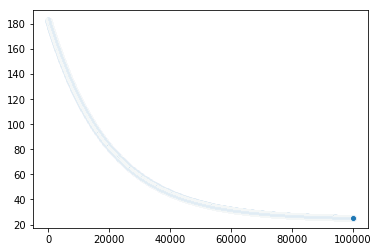

In [17]:
numIterations= 100000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations)